# Modelling Wind Speed and Direction Distribution using Gaussain Mixture Modles (OEN method)

OEN Method: Harris, Cook
The parent wind speed distribution: Why Weibull?
http://www.sciencedirect.com/science/article/pii/S0167610514001056

Gaussian Mixture Modles, 
http://scikit-learn.org/stable/modules/mixture.html

# 1. Set up

## 1.1 Environment

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from __future__ import division
from import_file import *
load_libs()

In [2]:
## Input params used outside this notebook
# params = {'gaussian_number': 4, 'file_path': "./data/NCDC/uk/weybourne/dat.txt"}
dictget = lambda d, *k: [d[i] for i in k]
if 'params' in globals():
    input_file_path, NUMBER_OF_GAUSSIAN, FIT_METHOD, KDE_GRIDSEARCH = dictget(params, 
                                                                              'input_file_path', 'gaussian_number', 'fit_method', 'kde_gridsearch')

## 1.2 Read Data

In [3]:
# ipath= './data/NCDC/uk/boscombe_down/dat.txt' # try 4
# ipath= './data/NCDC/uk/middle_wallop/dat.txt' # good
# ipath= './data/NCDC/uk/southhamption/dat.txt'
# ipath= './data/NCDC/uk/bournemouth/dat.txt'
# ipath= './data/NCDC/tiree.txt'
# ipath= "./data/NCDC/marham.txt"
# ipath= "./data/NCDC/uk/holbeach/dat.txt"
# ipath= "./data/NCDC/uk/weybourne/dat.txt"
# ipath= "./data/NCDC/uk/cambridge/dat.txt"
# ipath= "./data/NCDC/uk/wattisham/dat.txt"
# ipath= "./data/NCDC/uk/lakenheath/dat.txt" # irregular sampling time
# ipath= "./data/NCDC/uk/mildenhall/dat.txt" # irregular sampling time

# ipath= "./data/NCDC/southeast_asia/paya_lebar/dat.txt" # recent 5 year maybe corrupted, high initial speed
# ipath= "./data/NCDC/southeast_asia/sultan_ismail/dat.txt" # 
# ipath= "./data/NCDC/southeast_asia/singapore_changi/dat.txt" # corrupted
# ipath= "./data/NCDC/east_asia/cheongju_intl/dat.txt"
# ipath= "./data/NCDC/east_asia/daegu_ab/dat.txt" # recent 5 year data is corrupted

# ipath= "./data/NCDC/canada/melita_man/dat.txt" 
# ipath= "./data/NCDC/canada/mildred_lake_alta/dat.txt"  # uptail wind speed 
# ipath= "./data/NCDC/canada/manouane_est_que/dat.txt"  
# ipath= "./data/NCDC/canada/st_johns_intl/dat.txt" # lack 2011-12
# ipath= "./data/NCDC/canada/fort_smith/dat.txt" # hard to fit
# ipath= "./data/NCDC/canada/havre_st_pierre/dat.txt" # truncate, irregular sample time
# ipath= "./data/NCDC/canada/moosonee_awos/dat.txt" # truncate, irregular sample time
# ipath= "./data/NCDC/canada/hay_rivier_a/dat.txt" # truncate
# ipath= "./data/NCDC/canada/gander_intl/dat.txt" # truancate dataset, try 4, lack of 2011-12
# ipath= "./data/NCDC/canada/tukialik_bay/dat.txt" # truncate, time shift
# ipath= "./data/NCDC/canada/lac_benoit_que/dat.txt" # has 0 speed records
# ipath= "./data/NCDC/canada/blank_sablon/dat.txt" # truncate
# ipath= "./data/NCDC/canada/argentia/dat.txt" # weird shape
# ipath= "./data/NCDC/canada/longue_pointe/dat.txt" # data may have problem, weird direction distribution

ipath= "./data/NCDC/europe/landsberg_lech/dat.txt" # very good, can try 4
# ipath= "./data/NCDC/europe/avord/dat.txt" # try 4
# ipath= './data/NCDC/europe/ciampino/dat.txt' # try 4, wathc for KDE bandwidth
# ipath= "./data/NCDC/europe/holzdorf/dat.txt"
# ipath= "./data/NCDC/europe/neuburg/dat.txt"
# ipath= "./data/NCDC/europe/valladolid/dat.txt"
# ipath= "./data/NCDC/europe/vatry/dat.txt"  # double peak
# ipath= "./data/NCDC/europe/laupheim/dat.txt" # double peak, 4; narror ellipse; watch for bandwidth
# ipath= "./data/NCDC/europe/barayas/dat.txt" # 
# ipath= "./data/NCDC/europe/huspel_aws/dat.txt"  # integer
# ipath= "./data/NCDC/europe/diepholz/dat.txt" # recent year is integer
# ipath= "./data/NCDC/europe/salamanca/dat.txt" # recent 5 year is truncate data, before is better

# ipath= "./data/NCDC/south_america/senador_petronio/dat.txt"
# ipath= "./data/NCDC/south_america/ambrosio_lv/dat.txt" # 16 sectors

# ipath= "./data/NCDC/oceania/narrandera/dat.txt" 
# ipath= "./data/NCDC/oceania/brisbane_archerfield/dat.txt" 
# ipath= "./data/NCDC/oceania/brisbane/dat.txt" # bad fit
# ipath= "./data/NCDC/oceania/auckland/dat.txt"  # Weird KDE shape

# ipath= "./data/NCDC/cn/binhai/dat.txt" # recent 5 year has small problem, good overall
# ipath= "./data/NCDC/cn/luogang/dat.txt" # recent 5 year has small problem, good overall
# ipath= "./data/NCDC/cn/南京lukou/dat.txt" # watch for bandwidth? could apply width/length constrain
# ipath= "./data/NCDC/cn/tianjing/dat.txt" # 16 sectors
# ipath= "./data/NCDC/cn/gushi/dat.txt" # 16 sectors, some direction deviate big
# ipath= "./data/NCDC/cn/yueyang/dat.txt" # 16 sectors, some direction deviate big
# ipath= "./data/NCDC/cn/郑州xinzheng/dat.txt" # With 0 
# ipath= "./data/NCDC/cn/wuxu/dat.txt" # With 0 
# ipath= "./data/NCDC/cn/广州baiyun/dat.txt" # Problematic data
# ipath= "./data/NCDC/cn/武汉tianhe/dat.txt" # Problematic data
# ipath= "./data/NCDC/cn/zhengding/dat.txt" #  Initial data weird
# ipath= "./data/NCDC/cn/wusu/dat.txt" # initial speed weird
# ipath= "./data/NCDC/cn/beijing/dat.txt"  # very bad fit

# ipath= "./data/NCDC/cn/baoan_intl/dat.txt" # 
# ipath= "./data/NCDC/cn/shanghai/hongqiao_intl/dat.txt" 
# ipath= "./data/NCDC/cn/shanghai/pudong/dat.txt"
# ipath= './data/NCDC/cn/macau/dat.txt' # not good, feels like truncate data
# ipath= "./data/NCDC/cn/hk_intl/dat.txt" # truncate dataset

## US dataset, is mostly truncate, low wind speed is not complete
# ipath= "./data/NCDC/us/sheboygan/dat.txt" # untruncate us dataset, but recent 5 year maybe corrupted
# ipath= "./data/NCDC/us/sacramento_arp/dat.txt"  
# ipath= "./data/NCDC/us/st_louis_arp/9511346969491dat.txt"  
# ipath= './data/NCDC/us/huron/3461896967321dat.txt'
# ipath= "./data/NCDC/us/baltimore/9963956959409dat.txt"
# ipath= './data/NCDC/us/kennedy/5807936958436dat.txt'
# ipath= './data/NCDC/us/newark/dat.txt'
# ipath= './data/NCDC/us/la_guardia/1057036958434dat.txt'
# ipath= "./data/NCDC/us/olympia_airport/2647036962786dat.txt" 
# ipath= "./data/NCDC/us/sidney/6062326959357dat.txt" 
# ipath= "./data/NCDC/us/general_mitchell_intl/dat.txt"
# ipath= "./data/NCDC/us/quad_city_arp/dat.txt" 

## Problem dataset
# ipath= "./data/NCDC/canada/stony_rapids_arpt/dat.txt" # truncate data
# ipath= "./data/NCDC/canada/baker_lake/dat.txt" # wrong data
# ipath= "./data/NCDC/canada/rankin_inlet/dat.txt" # wrong data
# ipath= "./data/NCDC/canada/deer_lake_a/dat.txt" # bad dataset
# ipath= './data/NCDC/europe/tenerife_sur/dat.txt'  # recent year speed wired
# ipath= "./data/NCDC/south_america/carlos_ibanez/dat.txt" # bad dataset, direction
# ipath= "./data/NCDC/south_america/rio_cuarto/dat.txt"  # bad dataset
# ipath= "./data/NCDC/south_america/senador_nilo/dat.txt" # bad dataset, direction 
# ipath= "./data/NCDC/cn/长沙huanghua/dat.txt" # direction may not be real
# ipath= "./data/NCDC/dr_ambedkar_intl/dat.txt" # Wrong data
# ipath= "./data/NCDC/gran_canaria/dat.txt" # problem
# ipath= "./data/NCDC/tenerife_norte/dat.txt" # truncate

# ipath= "./data/cn_database/广州.txt" 
# ipath= "./data/cn_database/北京.txt" 

if 'params' in globals(): ipath = input_file_path

uipath = unicode(ipath , "utf8")

if not "cn_database" in ipath: 
    df = pd.read_csv(uipath,header=0, skipinitialspace=True)
    df.rename(columns={'Date':'date','Dir':'dir','Spd':'speed','Type':'type','I.1':'wind_type'}, inplace=True)
    df = df[['date','HrMn','type','dir','speed','wind_type' ]]
else:
    df = read_cn_database(uipath)

In [4]:
df = df.query("(dir <= 999) & (speed <= 999) & \
              (date >= 19800000) & (date < 20160000) ")

/Users/cqcn1991/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


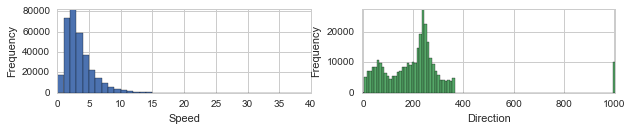

In [5]:
plot_speed_and_angle_distribution(df.speed, df.dir)

In [6]:
# Dir [10,360]=> [0,350]
df['dir'] = df['dir'].apply(lambda x: x%360 if x < 999 else x) 
# Convert Windrose coordianates to Polar Cooridinates 
df['dir_windrose'] = df['dir']
df['dir'] = df['dir'].apply(lambda x: (90 - x)%360 if x < 999 else x)
df.describe()

,date,HrMn,dir,speed,dir_windrose
count,3.323600e+05,332360.000000,332360.000000,332360.000000,332360.000000
mean,2.003306e+07,1166.551399,206.299446,3.222073,208.225238
std,6.998696e+04,687.821128,168.987661,2.315343,167.300150
min,1.990010e+07,0.000000,0.000000,0.000000,0.000000
25%,1.998071e+07,600.000000,110.000000,1.500000,110.000000
50%,2.004012e+07,1120.000000,200.000000,2.600000,210.000000
75%,2.009080e+07,1720.000000,250.000000,4.100000,250.000000
max,2.015123e+07,2359.000000,999.000000,34.500000,999.000000


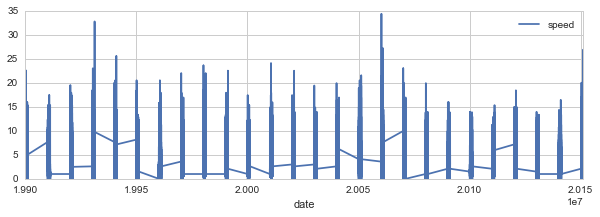

In [7]:
df.plot(x='date', y='speed',legend=True,figsize=(10,3))

### 1.2.1 Unit Detection

True


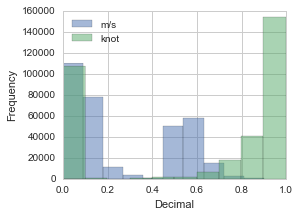

In [8]:
# Detect data stored in knot or m/s
## For data stored originally in knot, the data would cluster at 0.1 and 0.9
df['decimal'] = df.speed % 1 
df.decimal.hist(alpha=0.5, label='m/s', figsize=(4,3))
knot_unit = True if len(df.query('decimal >= 0.2'))/len(df) > 0.3 else False

# Using unit in knot instead of m/s
if knot_unit:
    df['speed']=df['speed']*1.943845
    df['decimal'] = df.speed % 1 
    df.decimal.hist(alpha=0.5,label='knot')
    # need more elaboration, some is not near an integer
    df['speed']=df['speed'].apply(lambda x: int(round(x)))
    plt_configure(xlabel='Decimal',ylabel='Frequency',legend={'loc':'best'})

print knot_unit

### 1.2.2 Sampling Type Selection

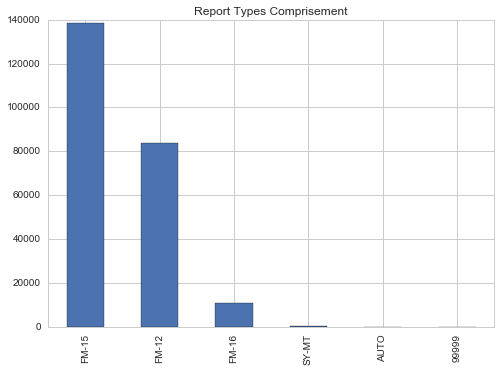

In [9]:
sample_type = df.query('date > 20000000')['type']
sample_type.value_counts().plot(
    kind = 'bar', title = 'Report Types Comprisement')

report_type_most_used = sample_type.value_counts().argmax()
df = df.query("type==@report_type_most_used")

### 1.2.3 Sampling Time Selection

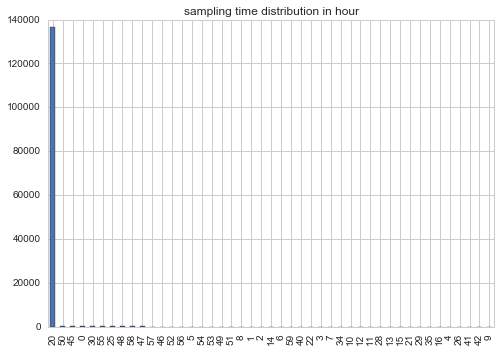

In [10]:
df['sample_time'] = df.HrMn % 100 
sample_time = df.query('date > 20000000')['sample_time']
sample_time.value_counts().plot(
    kind = 'bar', title = 'sampling time distribution in hour')

sampling_time_most_used = sample_time.value_counts().argmax()
df = df.query("sample_time==@sampling_time_most_used")
df.drop(['sample_time'], 1,inplace=True)

In [11]:
df['HrMn'].value_counts().sort_index()

20      5972
120     6072
220     6061
320     6055
420     6093
520     6162
620     6139
720     6119
820     6127
920     6140
1020    6143
1120    6151
1220    6129
1320    6117
1420    6137
1520    6177
1620    6162
1720    6146
1820    6165
1920    6172
2020    6127
2120    6152
2220    6092
2320    6023
Name: HrMn, dtype: int64

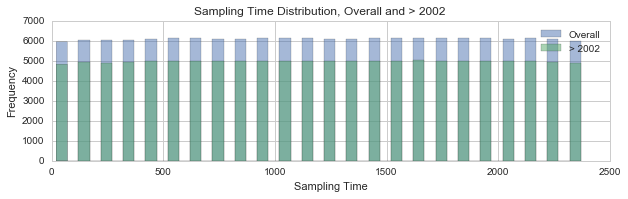

In [12]:
MID_YEAR = (min(df.date)//10000+max(df.date)//10000)//2
bins=arange(min(df.HrMn), max(df.HrMn) + 100, 50)

df['HrMn'].plot(
    kind='hist', alpha=0.5,bins=bins, label='Overall')

df.query('date > @MID_YEAR * 10000')['HrMn'].plot(
    kind='hist', alpha=0.5,bins=bins, label='> %s' %  MID_YEAR )

plt_configure(xlabel='Sampling Time', ylabel='Frequency', legend={'loc':'best'}, figsize=(10, 2.5), 
              title = 'Sampling Time Distribution, Overall and > %s ' %  MID_YEAR)

## 1.3 Data Wrangling

### 1.3.1 Artefacts handling

#### 1.3.1.1 wrong direction record

In [13]:
display(df.query("(dir % 10 >= 0.1) & (dir != 999)"))
df = df.query('(dir % 10 <= 0.1) | (dir == 999)')

,date,HrMn,type,dir,speed,wind_type,dir_windrose,decimal
43811,19940322,1820,FM-15,176,4,N,274,0.082075
62893,19960418,1720,FM-15,88,4,N,2,0.082075
79790,19980205,1320,FM-15,87,2,N,3,0.943845
85447,19981111,20,FM-15,159,14,N,291,0.995684
100830,20000220,1520,FM-15,157,7,N,293,0.997842
105139,20000520,820,FM-15,193,13,N,257,0.023762
112845,20001027,20,FM-15,229,7,N,221,0.997842
114764,20001206,120,FM-15,85,3,N,5,0.915768
118985,20010302,1220,FM-15,221,4,N,229,0.082075
122823,20010521,820,FM-15,29,34,N,61,0.017288


#### 1.3.1.2 sudden increase in speed

,date,HrMn,type,dir,speed,wind_type,dir_windrose,decimal,incre,incre_reverse
206971,20061013,2220,FM-15,60,53,N,30,0.066969,50.0,48.0
331296,20151115,1120,FM-15,200,52,N,250,0.483815,27.0,22.0
124085,20010617,20,FM-15,270,47,N,180,0.041049,42.0,39.0
80006,19980214,1720,FM-15,40,46,N,50,0.069127,40.0,43.0
211133,20070125,320,FM-15,150,45,N,300,0.902820,40.0,42.0
202142,20060614,620,FM-15,250,44,N,200,0.930897,40.0,41.0
144824,20021003,320,FM-15,350,44,N,100,0.930897,40.0,39.0
195005,20051221,1720,FM-15,270,42,N,180,0.987052,40.0,38.0
200303,20060429,20,FM-15,170,42,N,280,0.987052,40.0,39.0
51875,19950126,2220,FM-15,200,40,N,250,0.043207,18.0,13.0


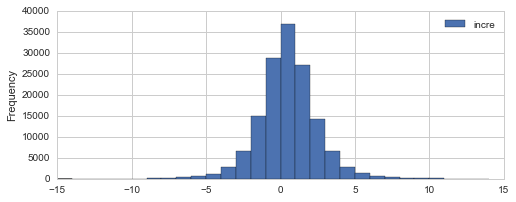

In [14]:
# sudden increse
df['incre'] = df.speed.diff(1)
df['incre'].fillna(0, inplace=True)
df['incre_reverse'] = df.speed.diff(-1)
df['incre_reverse'].fillna(0, inplace=True)

display(df.sort_values(by='speed',ascending=False).head(10))
df['incre'].plot(kind='hist', bins=arange(-15, 15), legend=True, figsize=(8, 3))

In [15]:
incre_threshold = 20 if knot_unit else 10
print 'sudden increase number', len(df.query('(incre > @incre_threshold )&(incre_reverse > @incre_threshold )'))
df = df.query('(incre < @incre_threshold )|(incre_reverse < @incre_threshold )')

sudden increase number 17


After Simple Aretefacts Handling

In [16]:
# Check the max speed
df.sort_values(by='speed',ascending=False).head(10)

,date,HrMn,type,dir,speed,wind_type,dir_windrose,decimal,incre,incre_reverse
51875,19950126,2220,FM-15,200,40,N,250,0.043207,18.0,13.0
98071,19991226,1320,FM-15,190,39,N,260,0.071285,6.0,1.0
325442,20150331,920,FM-15,200,39,N,250,0.071285,1.0,4.0
325444,20150331,1120,FM-15,190,39,N,260,0.071285,4.0,2.0
210874,20070118,2220,FM-15,210,38,N,240,0.904978,3.0,6.0
149257,20030102,2020,FM-15,200,38,N,250,0.904978,5.0,8.0
325441,20150331,820,FM-15,210,38,N,240,0.099362,1.0,-1.0
98073,19991226,1420,FM-15,190,38,N,260,0.904978,-1.0,8.0
194783,20051216,1420,FM-15,210,38,N,240,0.904978,6.0,4.0
325447,20150331,1420,FM-15,200,38,N,250,0.099362,2.0,6.0


### 1.3.2 Re-distribute angle, for un-evenly sectored data
For some dataset, the 16 sectors are not record properly,

e.g. the sectors are [0,20,30,50], need to redistribute the angle into 22.5

In [17]:
display(df['dir'].value_counts().sort_index())
effective_column = df.query('dir < 999')['dir'].value_counts()[df['dir'].value_counts() > 30].sort_index()
SECTOR_LENGTH = 360/len(effective_column)
print len(effective_column), SECTOR_LENGTH

0       2592
10      3754
20      4126
30      4776
40      3719
50      3782
60      3233
70      3287
80      2437
90      2217
100     1619
110     1843
120     1684
130     1864
140     1804
150     2378
160     2793
170     4105
180     4708
190     6974
200     9206
210    12174
220     8985
230     6978
240     4269
250     4463
260     4027
270     4757
280     3915
290     4055
300     3354
310     3270
320     2608
330     2458
340     1989
350     2427
999     4158
Name: dir, dtype: int64

36 10.0


In [18]:
if len(effective_column) == 16:    
    # For some dataset, the angle is not evenly distributed, so there is a need to redistribute
    original_angle = list(effective_column.sort_index().index)
    redistributed_angle = linspace(0,360,num=17)[:-1]
    df['dir'].replace(to_replace=original_angle, value=redistributed_angle, inplace=True)
    display(df['dir'].value_counts().sort_index())

### 1.3.4 Dir 999 Handling (Zero Speed and Variable Direction)

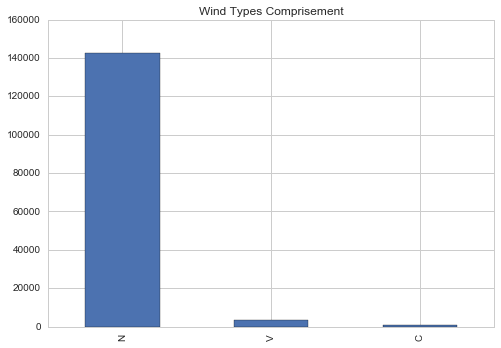

In [19]:
df['wind_type'].value_counts().plot(
    kind = 'bar', title = 'Wind Types Comprisement')

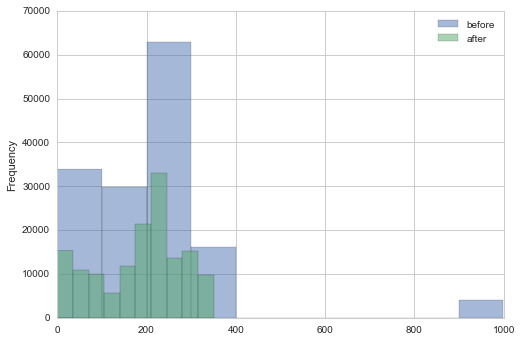

In [20]:
df['dir'].plot(kind='hist', alpha=0.5, label='before')
df['dir'] = df.apply(lambda x: np.nan if x.dir == 999 else x.dir, axis=1)
df['dir'] = df['dir'].interpolate()//SECTOR_LENGTH*SECTOR_LENGTH
df['dir'].plot(kind='hist', alpha=0.5, label='after')
plt.legend()

### 1.3.5 Time Shift Comparison

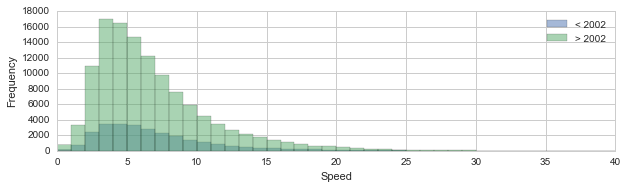

In [21]:
DIR_REDISTRIBUTE = 'even'
if DIR_REDISTRIBUTE == 'even':
    DIR_BIN = arange(-5, 360, 10) 
elif DIR_REDISTRIBUTE == 'round_up':
    DIR_BIN = arange(0, 360+10, 10) 

# Comparison between mid_year, looking for: 
# 1. Odd Even Bias
# 2. Time Shift of Wind Speed Distribution
bins = arange(0, max(df.speed) + 1)
df.query('date < @MID_YEAR * 10000')['speed'].plot(
    kind='hist', alpha=0.5,bins=bins, label='< %s' % MID_YEAR)

df.query('date > @MID_YEAR * 10000')['speed'].plot(
    kind='hist', alpha=0.5,bins=bins, label='> %s' % MID_YEAR)

plt.suptitle('Speed Comparison between year < %s, > %s ' % (MID_YEAR, MID_YEAR), fontsize = 14)
plt_configure(xlabel='Speed', ylabel='Frequency', legend=True, figsize=(10, 2.5))

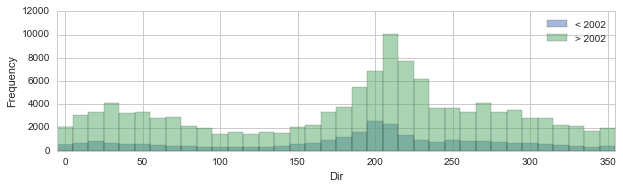

In [22]:
df.query('date < @MID_YEAR * 10000')['dir'].plot(
    kind='hist', alpha=0.5,bins=DIR_BIN, label='< %s' % MID_YEAR)

df.query('date > @MID_YEAR * 10000')['dir'].plot(
    kind='hist', alpha=0.5,bins=DIR_BIN, label='> %s' % MID_YEAR)

plt.suptitle('Dir Comparison between year < %s, and > %s ' % (MID_YEAR, MID_YEAR), fontsize = 14)
plt_configure(xlabel='Dir', ylabel='Frequency', legend={'loc':'best'}, figsize=(10, 2.5),tight='x')

1990 - 1994


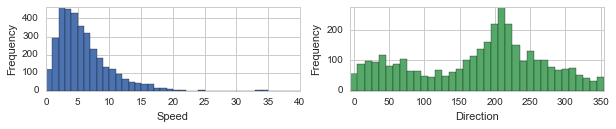

1995 - 1999


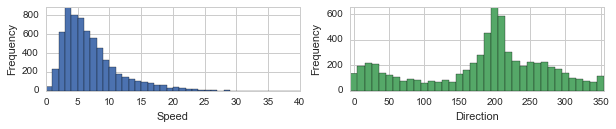

2000 - 2004


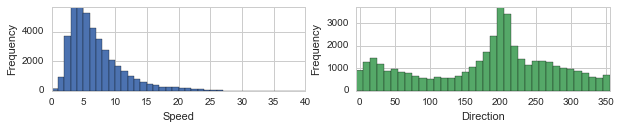

2005 - 2009


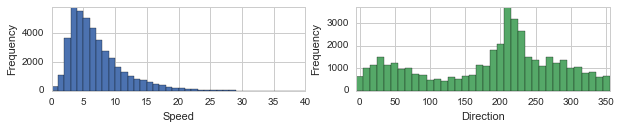

2010 - 2014


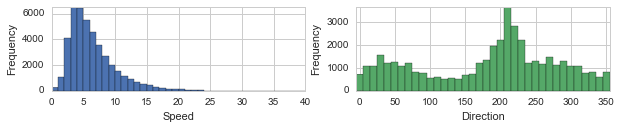

In [23]:
# Inspect the time shift of speed and degree distribution, and odd-even bias
check_time_shift(df)

## 1.4 Re-distribute Direction and Speed (Optional)
e.g. Dir 50 -> -45 ~ 55, to make KDE result better

In [24]:
def randomize_angle(df, sector_length = 10):
    if DIR_REDISTRIBUTE == 'even':
        df['dir_ran'] = df['dir'].apply(lambda x: (x + np.random.uniform(-sector_length/2,sector_length/2)))
    else:
        df['dir_ran'] = df['dir'].apply(lambda x: (x + np.random.uniform(0,sector_length)))

    bins=arange(0, 360+10, 5)
    df['dir'].hist(bins=bins, alpha=0.5, label='Original Data')
    bins=arange(0, 360+10, 1)
    df['dir_ran'].hist(bins=bins, alpha=0.5, label='Redistributed Data')
    plt_configure(xlabel="Direction", ylabel="Frequency", tight='x',
                  legend={'loc':'best'}, figsize=(10, 4))
    
    df['dir']=df['dir_ran']
    df.drop(['dir_ran'], 1,inplace=True)
    return df

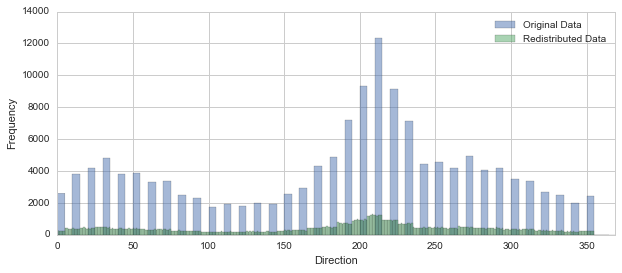

In [25]:
# Randomize the angle degree, to form a better KDE estimation
df = randomize_angle(df, SECTOR_LENGTH)

In [26]:
def randomize_speed(df):
    # Round down speed, need more caution
    if len(df.query('speed < 1')) > 200:
        # if has zero data
        print 'Contain 0, Redistribute upward, e.g. 0 -> [0,1]'
        df['speed_ran'] = df['speed'].apply(lambda x: (x + np.random.uniform(0,1)))
    else:
        # if lack zero
        print 'N0 0, Redistribute downward, e.g. 1 -> [0,1]'
        df['speed_ran'] = df['speed'].apply(lambda x: (x + np.random.uniform(-1,0)) if x > 0 else x)

    max_speed = df.speed.max()
    df['speed'].hist(bins=arange(0, max_speed), alpha=0.5, label='Original Data')
    df['speed_ran'].hist(bins=arange(0, max_speed, 0.5), alpha=0.5, label='Redistributed Data')
    plt_configure(xlabel="Speed", ylabel="Frequency", legend=True, figsize=(10, 4))
    
    df['speed']=df['speed_ran']
    df.drop(['speed_ran'], 1,inplace=True)
    return df

Contain 0, Redistribute upward, e.g. 0 -> [0,1]


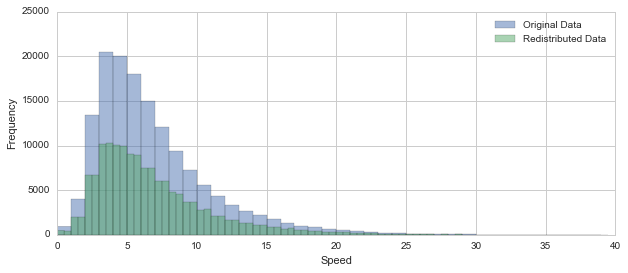

In [27]:
df = randomize_speed(df)

## 1.5 Generate (x,y) from (speed,dir)

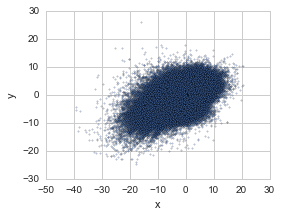

In [28]:
df['x'] = df['speed'] * cos(df['dir'] * pi / 180.0)
df['y'] = df['speed'] * sin(df['dir'] * pi / 180.0)
fig, ax = plt.subplots()
ax.set_aspect('equal')
df.plot(kind='scatter', x='x', y='y', alpha=0.35, ax=ax, s=2)
plt.gcf().set_size_inches(14, 3)

## 1.6 Re-select data, and overview of the clean dataset

In [29]:
## Summery of the data selection
print 'incre_threshold for artefact detect:', incre_threshold
print 'Report type used:', report_type_most_used
print 'Sampling time used:', sampling_time_most_used

df_all_years = df
df = df.query('(date >= 20100000) & (date < 20150000)')
df.describe()

incre_threshold for artefact detect: 20
Report type used: FM-15
Sampling time used: 20


,date,HrMn,dir,speed,dir_windrose,decimal,incre,incre_reverse,x,y
count,4.335900e+04,43359.000000,43359.000000,43359.000000,43359.000000,43359.000000,43359.000000,43359.000000,43359.000000,43359.000000
mean,2.012067e+07,1169.957333,182.430479,6.492108,202.169723,0.534169,-0.001199,-0.001222,-1.773118,-1.129454
std,1.415344e+04,690.918825,95.887084,3.797498,168.584660,0.445407,1.948469,1.947811,5.716883,4.412138
min,2.010010e+07,20.000000,-4.996521,0.001912,0.000000,0.000000,-28.000000,-29.000000,-28.049597,-19.871424
25%,2.011040e+07,620.000000,95.609111,3.823257,100.000000,0.053997,-1.000000,-1.000000,-5.299118,-4.137879
50%,2.012070e+07,1120.000000,204.584430,5.575950,200.000000,0.913609,0.000000,0.000000,-1.006947,-1.639353
75%,2.013100e+07,1720.000000,251.182895,8.152458,250.000000,0.943845,1.000000,1.000000,2.422928,2.205450
max,2.014123e+07,2320.000000,354.982805,30.602859,999.000000,0.997842,18.000000,16.000000,17.720150,17.058679


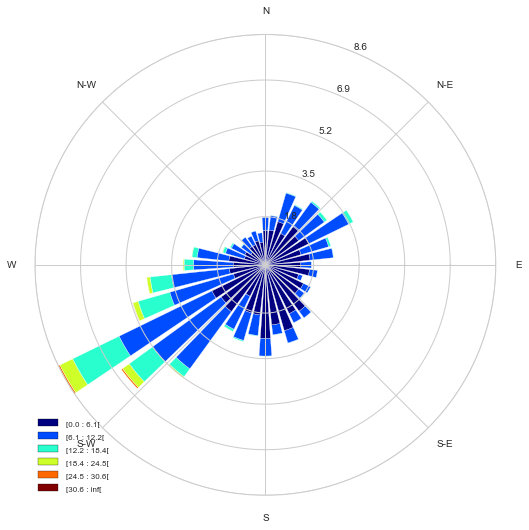

In [30]:
# 90 degree is in east
ax = WindroseAxes.from_ax()
ax.bar(df.dir_windrose, df.speed, normed=True, opening=0.8, edgecolor='white', nsector=36)
ax.set_legend()

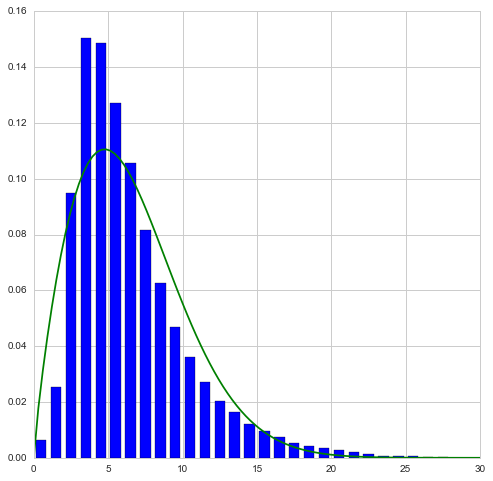

In [31]:
ax, _params = WindAxes.from_ax().pdf(df.speed, bins=arange(0, max(df.speed)))
weibull_params = sp.stats.exponweib.fit(df.speed, floc=0, f0=1)

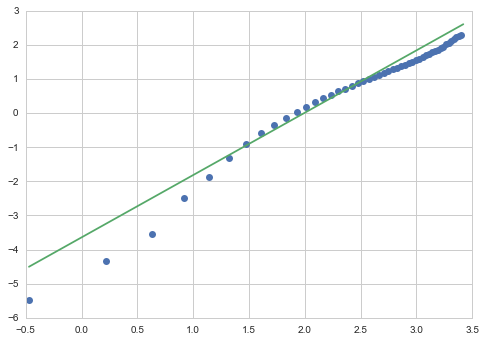

In [32]:
ecdf = sm.distributions.ECDF(df.speed)

x = linspace(0, df.speed.max())
y = ecdf(x)
plot(log(x), log(-log(1-y)),'o')

k_shape, lamb_scale = weibull_params[1], weibull_params[3]
y=1-exp(-(x/lamb_scale)**k_shape) # cdf
plot(log(x), log(-log(1-y)),'-')

# 2. Create input data, i.e. speed_set

In [33]:
# speed_set = array(zip(-df.x, -df.y)) # Adjust the direction to match for Cook's paper
SPEED_SET = array(zip(df.x, df.y))
if 'params' not in globals():
    NUMBER_OF_GAUSSIAN = 3
    FIT_METHOD = 'square_error'
    KDE_GRIDSEARCH = True
DEFAULT_BANDWDITH = 1.5 if knot_unit else 0.7

In [34]:
FITTING_RANGE = []
fit_limit = ceil(df['speed'].quantile(.95))
fitting_axis_range = arange(-fit_limit, fit_limit+1, 1)
print fitting_axis_range

for i in fitting_axis_range:
    for j in fitting_axis_range:
        FITTING_RANGE.append([i,j])

[-15. -14. -13. -12. -11. -10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1.
   0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.]


In [35]:
plot_limit = ceil(df['speed'].quantile(.975))
PLOT_AXIS_RANGE = arange(-plot_limit, plot_limit+1, 1)

# 3. Kernel Density Estimation

In [36]:
sample = SPEED_SET
KDE_KERNEL = 'gaussian'
# KDE_KERNEL = 'tophat'
# bandwidth = 1

In [37]:
# The bandwidth value sometimes would be too radical
from sklearn.grid_search import GridSearchCV

if KDE_GRIDSEARCH == True:
    if knot_unit:
        bandwidth_range = arange(0.5,2,0.2)
    else:
        bandwidth_range = arange(0.4,1,0.1)

    grid = GridSearchCV(neighbors.KernelDensity(kernel = KDE_KERNEL),
                        {'bandwidth': bandwidth_range},
                        n_jobs=-1, cv=4) 
    grid.fit(sample)
    bandwidth = grid.best_params_['bandwidth']

In [38]:
if 'bandwidth' not in globals():
    bandwidth = DEFAULT_BANDWDITH
    
kde = neighbors.KernelDensity(bandwidth=bandwidth,kernel = KDE_KERNEL).fit(sample)

points = FITTING_RANGE
# very slow if the dataset is too large, e.g. 100,000
# kde returns log prob, need to convert it
kde_result = exp(kde.score_samples(points))
print 'bandwidth:', bandwidth, len(kde_result)
print kde_result[:5]

bandwidth: 0.9 961
[  6.30474582e-05   1.13536052e-04   1.70629431e-04   2.43758049e-04
   3.57254902e-04]


In [39]:
# Plot jPDF
X = Y = PLOT_AXIS_RANGE
# Can't work if pass as generate_Z_from_X_Y(X,Y, exp(kde.score_samples())), need to use lambda
# see http://stackoverflow.com/questions/21035437/passing-a-function-as-an-argument-in-python
kde_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(kde.score_samples(coords)))

plot_3d_prob_density(X,Y,kde_Z)

fig = plt.subplots(figsize=(4, 3))
plot_2d_prob_density(X,Y,kde_Z,xlabel='x', ylabel='y')

with sns.axes_style({'axes.grid' : False}):
    fig = plt.subplots(figsize=(4, 3))
    plt.hist2d(df.x, df.y, bins=PLOT_AXIS_RANGE, cmap='jet')
    plt.gca().set_aspect('equal')
    plt.colorbar()
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAUEAAAFBCAYAAADpDh0xAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsfXmYHFW5/tt7T/f0JAYkJgGSQLhhUYgS+akICCQXXCCA
yb1sRhYNKuEqRDZZEjULCle4CgiRq0AgEAJhNWwxoBfZwQQNJIKQAAkSyTY9vW+/PzrfmdOnT1Wd
qq7qrpqp93nmmZnu6qrT3VVvfev7BWq1Wg0+fPjwMUgR7PQCfPjw4aOT8EnQhw8fgxo+Cfrw4WNQ
wydBHz58DGr4JOjDh49BDZ8EffjwMajhk6APHz4GNXwS9OHDx6CGT4I+fPgY1PBJ0IcPH4MaPgn6
8OFjUMMnQR8+fAxq+CTow4ePQQ2fBH348DGo4ZOgDx8+BjV8EvThw8eghk+CPnz4GNTwSdCHDx+D
Gj4J+vDhY1DDJ0EfPnwMavgk6MOHj0ENnwR9+PAxqOGToA8fPgY1fBL04cPHoIZPgj58+BjU8EnQ
RxNqtRqq1SpqtVqnl+LDh+MId3oBPtyFarWKcrmMfD6PQCDAHk8kEgiFQh1cmQ8fzsAnQR8MuVwO
6XQa8XgcwWAQtVoNuVwOlUoF1WoVwWAQ4XCY/fZJ0cdAgE+CPlCr1VCpVFAqlVCpVFAoFBjpVatV
AGBWYblcRq1WQ6FQQDAYRCgU8knRh6cRqPmBn0ENcn+r1SoKhQKy2ax0u0AggFAoxH6Cwf5wMp1C
Pin68CJ8EhzEKJfLqFQqAIBCoYBMJgMACIVC6OrqQqVSQT6flyZIfFL0MVDgk+AgRK1WayDAbDaL
QqHAnu/q6kI4HG6ICSYSCeY20w8PIkWKGfKkWCwWUSwW0dXVhVgs5pOiD1fBjwkOMlSrVZRKJUZo
fX19qFarCIVCiMViuu4wWXZAfxkNT4rlchnlchlAvxUYCoWYZUjk68cUfbgJPgkOEvBWHJEQEV4s
FkMikWAEpgLeHab9i6RIhEugv0OhEAKBgC4pRqPRhhIdHz6cgk+CgwDFYhHlcpmVvWQyGZRKJQQC
ASSTSUSj0ZaPoUeKvOVJbjRvKRqRYigUQiQS8UnRhyPwSXCAo1KpYMeOHSiXy0ilUshkMqhWqwiH
w+ju7m6I3RHsCBOLpFgsFhGNRhkZVqvVBktRjxRLpRLy+TxKpRJCoRASiYRPij5sg0+CAxSi+wsA
6XQaQD3xEY/HlUiEtqnVai2TDsX+xPWpkmKxWGRJl3w+71uKPmyBT4IDEHztH7mlQJ3Quru7EYlE
OrzC+lrC4bApUqTt6PWipeiTog8r8ElwgIGytEA9EZHJZBhx9PT06GZgO0kaKqRIj2cyGSX3mZIs
Pin60INPggMEerV/1P7mJRKQkSIVc9P74S1FsXA7EAg0bEOJFr6e0S/J8QH4JDggwNf+VatV9PX1
oVKpIBgMoru7G7lcjllSKqD4n5vq6InAg8GgtHBbLOCWdbPwCjnRaJQJRRDZeukm4cM++CTocfDW
X7FYZNYS1f4FAgHXXNx2kqqR+6xFijx4S5GKwX1SHHzwSdCjKBaLyOVyzLXLZDIoFosAgGQyiVgs
1uEV9qMdZKJHinSj4EmRd6N5S9EnxcEHnwQ9CBI2yGaziMfjrPYvFAqhu7tbM9ZlZIkNpIucJ8VY
LMYKt4kQa7Uau2kA2u6zT4oDHz4Jeghi1wUA5PN5AEA8HkdXV5f0wvQvVjACCwQCqFQqiEQiCAaD
pmOKRIq0fTweRzweZxlqH96DT4IegVj7R+QHAN3d3ba0vsnAF0sPBPAyX5FIhNVMin3PRqRIZBgK
hVjSiZ6LRCI+KXoIPgl6ANR/C9QTIX19fexijsfjthNgrVYbMKSnCrIUVUiRTzZRGEIsyQH6iZPK
cXxSdCd8EnQxxNq/XC7HLMBoNIpisWjqwjJDbG4rkWk3eFKkm4KseLtYLDKLkC/c5kmRYo/ifBaf
FN0BnwRdCrH2L5PJMCWY7u5uFti3u+zERzOI1HhSJPIjZR5eS1FU3abXE4HypEgJHFGd20f74JOg
C8Fbf3zrWzQaRSKRQDAYbNDpM4JPbvaC/zxJKVu0FPVIkciOwhyFQgGxWKyheNu3FNsHnwRdhHK5
jHQ6jWAwyFSeqfUtkUggFouxC8PKBeJl99bNa5dZinqq2zwp8u+LtxRpG58UnYdPgi4Bnfz5fB6R
SASFQgGVSqXl2j8rcDvhuB0qqts8KQJgf4uWok+KzsMnwQ5DpvtHri7f+tYKzL6+UqkgnU43vM7N
xOh2mFXd1nOfy+WyT4o2wyfBDkKs/cvlcuw5o9o/J094XraKQNJUolKLD/PQUt0GILUUZbJhtC2R
Iv0fDodZ3Nj/ftTgk2CHwNf+8VPfgHrW0IniZz1rjuoPAbDZIzTro1wuN2Q3CWINnBcuOrdatKLq
tt7QKhkpVqtV5PN5NiqVtxSpO8YL308n4JNgmyHW/uXzeWYBxuNx5PN5x2r/tF7PT54D+uNS1WqV
uWKUBdUrINYaxu5GtEoIvMK13fsxO8lPJDiZpeiTojZ8EmwjRPe3r6+PWVnd3d0Ih8MN7XB6MHMC
a21LQqV0kSSTSWYNymBUQCzLgJJl4sM6VEiRUC6Xkc1mdd1ncZIfFXEPVlL0SbBN4K0/vvUtEokg
mUyyWjOgPS4brYGfPGeWWM2UhdAx6YIerBecHZCRYqlUYjczo6FVYqKlUCiwom0+0TJY4JOgw6Da
v1AohGg02tD61u7aP7LeePeXV5/h92V2LXbMHfZhDXQzAsBEIcxO8gPAZj739vaiWq0ilUoNilEE
Pgk6COobJTn3fD7fIHtPgXARKsRmlTBF95dPwNhJRDwpBgIBFAoFJk4guzAHa+bZrtgiDyuT/PjP
n25gZMnz7vNAtBR9EnQAMt0/KmOIRqNIJpNtvcjpWLlcDrVaDeFwGMlksu0nMq/SYmVGiJvgpTin
WVIkULE+P8mPPImBRIo+CdoMPvkBoKH2T0X23iw5Gl2MFC+iv/XEV/nXOH2RixemkXSVOHfYLXCL
xWrGolQhRaBfsFdmpQ8kUvRJ0EZQoJlOKrH2T3Xuh10XOu/+AmACDG6Eip4fPZ7JZFxvKXoJIimS
YIcYWySokqIYp3QrfBK0AWLtH594iMViLPumAru247O/VPOnFYNUOU67LTCxHKdarTKrWpSu8nKS
xYmYoB0IBALspm02dMGTIt2wEokEnnvuOey222446KCDOvW2pPBvoS2CnzlBtX/ZbJbV/pHlZTaL
28q2hUKBZfhisRi6urqU9+fkxWiVSHl3OBQKIZlMoqurC9FolMnbl0ol5PN5ZDIZpr5Dlokda3A7
nCRTshSpl52qGkgPkUQecrkcMpkMcrkcisViQzijVqvhxRdfxIYNG5Tey+zZs3HyySdj+vTpeO+9
9xqeX7lyJaZOnYqTTz4ZS5cubXhu9erV+MY3vsH+f+ONN3Daaadh+vTp+Na3voWtW7c2Hc+3BFuA
WPtHU9+o7q7dbppW9pefqtYJ2H1hapXj0Pehl3l2q+XlJtRqNd1z18woAqB+bTz11FPI5XKIx+OG
x1+xYgWKxSLuvvturF69GgsWLMCNN97I9nXVVVdh2bJliMViOOWUU3D00Udj2LBhuOWWW/Dggw8i
mUyyfc2fPx9XXnklxo8fjyVLlmDhwoW45JJLGo7nk6AFkNVBbhjf+tbV1YV4PN50kalaIGZk7flj
UAxST35Ldb/Ue+oVyEhR76IEoNlypoqBalFagRYp0k3p73//Oy688EIAwPLly/HQQw/hyCOPxEkn
nST97F955RUcdthhAICDDjoIf/vb39hz//jHPzB69Gh0d3cDAA4++GC89NJLOOaYYzB69GjccMMN
uOiii9j2115

In [40]:
kde_cdf = cdf_from_pdf(kde_result)

# 4. GMM by Expectation-maximization

In [41]:
sample= SPEED_SET
clf = mixture.GMM(n_components=NUMBER_OF_GAUSSIAN, covariance_type='full')
clf.fit(sample)
print clf.converged_

True


In [42]:
gmm_em_result = read_gmm_em_result(clf)
pretty_print_gmm(gmm_em_result)  

,weight,mean_x,mean_y,sig_x,sig_y,corr
1,0.394,-0.585,-3.307,3.775,2.412,0.334
2,0.327,1.818,2.905,4.014,3.033,0.253
3,0.278,-7.675,-2.783,5.126,4.722,0.448


GMM Plot Result
0.394469701901 [[-0.58490304 -3.30741621]] [ 2.19887677  3.90312044] -72.0905032831
0.327077320283 [[ 1.81835291  2.9048334 ]] [ 2.8330231   4.15757661] -69.1529927608
0.278452977816 [[-7.67502567 -2.78281704]] [ 3.64067502  5.9426123 ] -50.1976574852


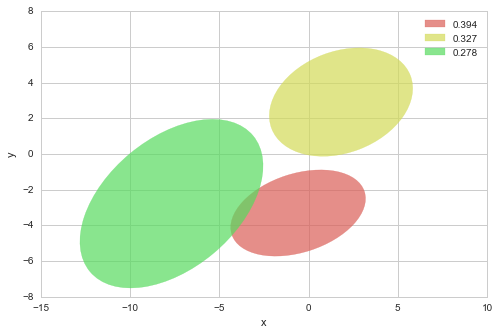

In [43]:
plot_gmm_ellipses(gmm_em_result)

In [44]:
X = Y = PLOT_AXIS_RANGE
pdf_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(clf.score_samples(coords)[0]))

def residule_between_kde_and_gmm(points):
    kde_vals = exp(kde.score_samples(points))
    gmm_vals = exp(clf.score_samples(points)[0])
    return kde_vals - gmm_vals 

residual_Z = generate_Z_from_X_Y(X,Y, residule_between_kde_and_gmm)

plot_3d_prob_density(X,Y,pdf_Z)
plot_3d_prob_density(X,Y,residual_Z)
align_figures()

fig = plt.figure(figsize=(4,3))
plot_2d_prob_density(X,Y,kde_Z,xlabel='x',ylabel='y')
fig = plt.figure(figsize=(4,3))
plot_2d_prob_density(X,Y,pdf_Z,xlabel='x',ylabel='y')
fig = plt.figure(figsize=(4,3))
plot_2d_prob_density(X,Y,residual_Z,xlabel='x',ylabel='y')
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAUEAAAFBCAYAAADpDh0xAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsvXmcHFW5Pv70vk13QoAEhiWRRQRBVuGqgCDhe8n1Ciqg
gNywL15wQURBlrAkBAEF2URE1CCbiKJowB/cEJBFVtnCchM1IIkmF7JMT+/b74+et+at0+dUnaqu
numa1PP5zGdmuqtOV3dXPfWuzxtqtVotBAgQIMAGivB4H0CAAAECjCcCEgwQIMAGjYAEAwQIsEEj
IMEAAQJs0AhIMECAABs0AhIMECDABo2ABAMECLBBIyDBAAECbNAISDBAgAAbNAISDBAgwAaNgAQD
BAiwQSMgwQABAmzQCEgwQIAAGzQCEgwQIMAGjYAEAwQIsEEjIMEAAQJs0AhIMECAABs0AhIMECDA
Bo2ABAMECLBBIyDBAAECbNAISDBAgAAbNAISDBAgwAaNgAQDBAiwQSMgwQABAmzQCEgwQIAAGzQC
EgzQgVarhWaziVarNd6HEiBAzxEd7wMI0F9oNpuo1+sol8sIhULG4+l0GpFIZByPLECA3iAgwQAG
SqUS8vk8kskkwuEwWq0WSqUSGo0Gms0mwuEwotGo8TsgxQATAQEJBkCr1UKj0UCtVkOj0UClUjFI
r9lsAoBhFdbrdbRaLVQqFYTDYUQikYAUA/gaoVYQ+NmgQe5vs9lEpVJBsViUbhcKhRCJRIyfcHg0
nEynUECKAfyIgAQ3YNTrdTQaDQBApVJBoVAAAEQiEaRSKTQaDZTLZWmCJCDFABMFAQlugGi1WiYC
LBaLqFQqxvOpVArRaNQUE0yn04bbTD8cRIoUM+SkWK1WUa1WkUqlkEgkAlIM0FcIYoIbGJrNJmq1
mkFow8PDaDabiEQiSCQSlu4wWXbAaBkNJ8V6vY56vQ5g1AqMRCKGZUjkG8QUA/QTAhLcQMCtOCIh
IrxEIoF0Om0QmA64O0zri6RIhEugvyORCEKhkCUpxuNxU4lOgAC9QkCCGwCq1Srq9bpR9lIoFFCr
1RAKhZDJZBCPx7t+DStS5JYnudHcUrQjxUgkglgsFpBigJ4gIMEJjkajgfXr16NeryObzaJQKKDZ
bCIajWJgYMAUuyN4ESYWSbFarSIejxtk2Gw2TZaiFSnWajWUy2XUajVEIhGk0+mAFAN4hoAEJyhE
9xcA8vk8gHbiI5lMapEIbdNqtbomHYr9icenS4rVatVIupTL5cBSDOAJAhKcgOC1f+SWAm1CGxgY
QCwWG+cjbB9LNBp1RIq0He0vWooBKQZwg4AEJxgoSwu0ExGFQsEgjlwuZ5mBHU/S0CFFerxQKGi5
z5RkCUgxgBUCEpwgsKr9o/Y3P5GAjBSpmJveD7cUxcLtUChk2oYSLbyeMSjJCQAEJDghwGv/ms0m
hoeH0Wg0EA6HMTAwgFKpZFhSOqD4Xz/V0ROBh8NhaeG2WMAt62bhCjnxeNwQiiCy9dNNIoB3CEjQ
5+DWX7VaNawlqv0LhUJ9c3F7Sap27rOKFDm4pUjF4AEpbngISNCnqFarKJVKhmtXKBRQrVYBAJlM
BolEYpyPcBRjQSZWpEg3Ck6K3I3mlmJAihseAhL0IUjYoFgsIplMGrV/kUgEAwMDyliXnSU2kS5y
ToqJRMIo3CZCbLVaxk0DULvPASlOfAQk6COIXRcAUC6XAQDJZBKpVEp6YTq9WKmnmMcF+yk+6AZE
YKFQCI1GA7FYDOFw2HFMkUiRtk8mk0gmk0aGOoD/EJCgTyDW/hH5AcDAwIAnrW9EdLIe4lKpZGRU
ReksP4HLfMViMaNmUux7tiNFIsNIJGIknei5WCwWkKKPEJCgD0D9t0CboIaHh42LOZlMekKA9Xrd
6CgJhUJGBrZSqRhkwFVirPQE/QiyFHVIkSebKAwhluQAo8RJN4+AFPsTAQn2McTav1KpZFiA8Xgc
1WrV0YUlc2lFRRkAxkVLEvvk9pEraSedNREueE6KrVZLWbxdrVYNi5C/d06KFHsU57P4/TOaKAhI
sE8h1v4VCgVDCWZgYMAI7HcTq6N1KfCfTqdRKBSUcUUn0lkyPUG/gkiNkyKRHynzWFnJtD99TpwU
KYEzEaxpvyIgwT4Et/5461s8Hkc6nUY4HDbp9NlBRmrkVnNFGSdwoydYr9eN/fxsBfFjJ6Vs0VLU
CR1QmKNSqSCRSJiKt/3+GfkJAQn2ESguFw6HDZVnan1Lp9NIJBLGheHmAiG3rlwuo1QqATAryjjp
KhEhI0VOCGJmW9bmZnfs/QqZpWilus0/K/6+uKVI2wSk2HsEJNgnoJO/XC4jFosZCYlua//EbYeH
hw33V6Uo45WeINXThcNhVCoVw/3Tyb6qLng/EIGOlcxJERjNyIuWYkCKvUdAguMMme4fuZC89a0b
0P7kVlsJqvYSpOYC2Hd08Myq3y92p6rbVu5zvV4PSNFjBCQ4jhBr/8hFBexr/3RP+FarZZBqq9Wy
FFQdy4tI1dEh/tAFL+oJ+hkq1W0AUktRlXnnpEj/R6NRI24ckKIeAhIcJ/DaPz71DWhnDb2o/eNZ
ZaAd/0ulUo7W4MrSvYRdSQpZSfSe3NYo9iuJiqrbupl3XqNYLpeNUancUqTumIAU5QhIcIwh1v7x
JEUymUS5XO669g9ou9RUVE0dDn7Rz1MlGuhzkpWk8G4WJ2MD3IIrXHu9jptyJHF/QO0+B6RoRkCC
YwjR/R0eHjbKRgYGBhCNRk3tcFZQncCy7C8Ak6tth36zlrg7HIlEkEwmO0ihVqtZWkp+hg4pEur1
OorFoqX7LE7yo+SV3z8ntwhIcIzArT/e+haLxZDJZIxaM8A9CZGgKhVVZzIZxGIxbWL1Czbkwm1A
/v5rtZph8dkNrRITLZVKxbCmeaJlQ0FAgj0G1f5FIhHE43FT65tXtX+A2f3lxCrbVgd+sgqsahSJ
EFWF2xPBAuKWMolCWL1/laVM9ZxDQ0NoNpvIZrOm3ueJioAEewjqGyU593K5jEZjVPaeAuEidMiK
JyyKxaJBrE7GaarWpHX9ajXZCayKMUWnhdtewqvYIoed6rYdKZJlTZ8Rd58noqUYkGAPINP9ozKG
eDyOTCbj2UlPF7YVsTp9rWaziaGhIZNail8JETCTQijUnl9M9YpuC7f99Hk4JUUCFeuTriTdQCYa
KQYk6DF48gMwJyR0ZO91CYvX/qncX6egY6bJdNwarFQqqFarjrOw/Qpy8wB72SyZGAKhXz4DJxal
DikCo4K9spvCRCLFgAQ9hNgnK9b+6c79sLIyqKiaTlCyAHVOfqt1KVlDyGQyxglOliZZCxMtC2un
JSjr++2mz7rfIJIidRaJsUWCLimKccp+RUCCHkCs/eP6fIlEwsi+6cBqOzH7S3p/3ZCPTE+QTmCq
LazX64jFYohGo4alK3OjxjO25iVUhdv0vnnPL5WjuG1d60VM0AuEQiHjpu10vCknRSpsT6fTePrp
pzF16lTsuuuu4/W2pAhIsEuItX9cn49KVCqVimOhAxE0TpO7v+vWrXOURJEdOz/egYEBY7aIah2r
LKzq4uinOSVOj0FVuF0ulw2C7Adx2V6SqWgp6o4iIEuQSPHZZ5/FLrvsYkuCrVYLF198Md566y3E
43HMmzcPW221lfH8okWLcNNNNyEajeLwww/HkUceqdzn9ddfx5w5c5BIJPChD30IF1xwQcfrBSTY
BcTaP5r65qVAgej+imU13Ry7qCfo9HidXhxcT3C8BUTdfn78+BuNhnQQvE45Sj+DuoxUcDKKAGh/
748++ihKpRKSyaTt6z/yyCOoVqu4++678fLLL2P+/Pm46aabjLWuuOIK/PrXv0YikcDRRx+Ngw46
CC+88IJ0nws

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAARYAAADZCAYAAADlhB+aAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzt3X9UVHX+P/AnzC+Qwfi6mal4oCbW1AgUKk62nHaVVc+n
/AVjQMz4g12tTp2z/kpMBSyRdhdjz0a0tbpbQin+qMOpz7dt9Zh4MjdhlHEhoRMUKLYsLu43figw
w/3+QXecGebemWHeM3NneD3O2bMwd+77vkedZ+/7vu97XyEcx3EghBCGQv3dAUJI8KFgIYQwR8FC
CGGOgoUQwhwFCyGEOQoWQghzcn93gBDiGY7jUFhYiObmZiiVShQVFWHGjBmW7adOnUJ5eTnkcjnS
09Oh1Wot24xGI0pKSlBRUQEAaG9vR15eHkJDQxEXF4eCggIAQFFRES5cuICIiAgAQHl5OdRqtWin
CCEB7O9//zuXl5fHcRzH1dfXc88++6xl29DQEJeWlsb19PRwg4ODXHp6Ovef//yH4ziO+/Of/8w9
8cQT3FNPPWV5/zPPPMPV1tZyHMdx+fn53IkTJziO47isrCzuxo0bLveJToUICXAGgwE/+9nPAAAJ
CQloaGiwbGtpaUFMTAzUajUUCgWSkpJQW1sLAIiJicEbb7xh01ZjYyOSk5MBAKmpqTh37hw4jkNb
Wxvy8/ORlZWF48ePO+0TnQoREuB6e3sRGRlp+V0ul2N4eBihoaGjtkVERKCnpwcAkJaWho6ODsF2
+ffevHkTOp0Oa9euhclkgl6vR3x8PH76058K7huwwWIwGPzdBUJEJSUlufS+CydOgJs0SXC7UqlE
fHy84Ha1Wo2+vj7L73yo8Nt6e3st2/r6+jBx4kTBtvj9rN8bHh4OnU4HlUoFlUqFlJQUNDU1BWew
AMCWLVFO39PT02OT2N7g7WMEw2fwxTGk9BlKSv7rcpvcpEmI2rJFcPt/S0pE9583bx4+++wzLF68
GPX19TZfeI1Gg7a2Nvzwww8ICwtDbW0tcnNzbY9vdbvgrFmzUFtbi4ceeghnzpxBSkoKWltbsXHj
RlRXV8NkMsFgMGDlypWifQroYCGEjJzSnD17FpmZmQCA4uJifPzxx7h58ya0Wi22b9+OdevWgeM4
aLVa3HXXXTb7h4SEWH7etm0bdu3ahaGhIWg0GixevBghISFYvnw5tFotFAoFVqxYAY1GI9qnEI4L
zLubDQYDjVjoGD5t351jlJT81+VTIYPB4HTE4mpbUkFXhQghzFGwEEKY81uwGI1G6HQ6AMDly5eR
mpoKvV4PvV6PTz75xF/dIoQw4JfJ2/3796O6utqyPLihoQHr1q3DmjVr/NEdQghjfhmx2K/4a2xs
xOnTp5GTk4MdO3agv7/fH90ihDDil2BJS0uDTCaz/J6QkIAXX3wRlZWVmDFjBl5//XV/dIsQwogk
1rEsXLjQcgkvLS0Ne/bscWk/fmkyq/d5wtvHCIbP4ItjBMNnCAaSCJbc3Fzs2rUL8fHxOHfuHObM
mePSfq6sJ5DS2gapth8sx5DWZ3B95W0wkkSwFBYW4pVXXoFCocDkyZPx8ssv+7tLhBAP+C1Ypk+f
jsOHDwMAZs+ejUOHDvmrK4QQxmiBHCGEOQoWQghzFCyEEOYoWAghzFGwEEKYo2AhhDBHwUJIgOM4
DgUFBcjMzIRer8eVK1dstp86dQoZGRnIzMzE0aNHRff56quvoNVqkZOTY7MC/siRI0hPT0dmZiZO
nz7ttE8ULIQEuJMnT2JwcBCHDx/G5s2bUVxcbNlmMpnw6quv4p133kFFRQWqqqrQ3d0tuM+uXbuw
c+dOVFZWQq1W46OPPsL169ct++7fvx/79u3D0NCQaJ8oWAgJcO7UFUpOTsb58+dH7dPY2AgA6Ozs
REJCAoCRh3TX1dXh0qVLSEpKglwuh1qtRmxsLJqbm0X7RMFCSIATqivkaNuECRPQ09ODvr4+m9dl
MhmGh4cxY8YM1NXVAQA+++wz3Lp1S7ANMZK4V4iQca+jfsy7ultX6I477hDcZ+/evSgqKoLZbEZS
UhJUKhUiIyPdqk0EULAQIgmajYmC25yV5nOnrlBdXZ2lrpCjfWpqarBv3z7ccccd2LNnD1JTUzF7
9myUlpZicHAQAwMDaG1tRVxcnGifKFgICXDu1BXKyMjAXXfd5XAfYOTpjqtXr0Z4eDgeeeQRpKam
AgB0Oh2ys7PBcRw2bdoEpVIp2ieqK8TA+HrOiHSPIaXP4G5doaTzwnWFDA9TXSFCCKFgIYSwR8FC
CGFOEgXL2tvbkZ2djZycHOzevdtfXSKEMOKXYNm/fz927txpWRZcXFyMTZs2obKyEsPDwzh58qQ/
ukUIYUQyBcuSk5MBAKmpqTh37pw/ukUIYUQSBcusr3hHRERQ3RZCApwkFsjxy48B15YL86hgGR3D
1+376hiBThLBMnv2bNTW1uKhhx7CmTNnkJKS4tJ+VLCMjuHL9t07BhUs87tt27Zh165dGBoagkaj
weLFi/3dJUKIByRRsCw2NhYVFRX+6gohhDFaIEcIYY6ChRDCHAULIYQ5ChZCCHMULIQQ5iRxuZkQ
MnYcx6GwsBDNzc1QKpUoKirCjBkzLNtPnTqF8vJyyOVypKenQ6vVCu6zadMmXL9+HRzHoaOjA3Pn
zsW+ffuwZ88eXLx4EREREQCA8vJyqNVqwT5RsBCP1E+aBgBI7L7m556MX9Y1goxGI4qLi1FeXg7g
dl2hDz74ACqVCllZWViwYAEMBoPDfV577TUAwA8//IDVq1fjpZdeAjBSyOzAgQOIinL+1EaAgoW4
iA8Qe4lzw1F/8eao7RQ0vuNqXSEAlrpC9fX1gvsAwB//+Efk5OTgJz/5CTiOQ1tbG/Lz89HV1YWM
jAykp6eL9omChTg0Kijmhgu+136bddBQwHifUF2h0NBQl+sKWe/T3d2NL7/8Ejt27AAA9Pf3Q6fT
Ye3atTCZTNDr9YiPj7epBmCPgoVYWIeJWJA4w+/LBwyFi3NmzjjmfVnWFQKAv/3tb3jiiScQEhIC
AAgPD4dOp4NKpYJKpUJKSgqampooWIgwPkxMd5iQ7EGYOGJ/mqTpES/LOZ7d2pAsvNFJLTOWdYUA
4Ny5c3juuecsv3/77bfYuHEjqqurYTKZYDAYsHLlStE+UbCMQ45Oc7z1KADr0UtztAbJ/+/fXjnO
eMayrhAAfPfddzZXlTQaDZYvXw6tVguFQoEVK1ZAo9GI9onqCjEQKI8DEDvV8cWfU11dD+QyuddO
jaT0d+1uXaH7E7cLbm+qLw64ukI0YhkHWM2deGrmTKDlG9C8yzhAwRLEWAVKw7K+Ua89UB0xpras
510oXIIXBUuQslzuHUOgOAqSuTG3f77YNvo97gQNhUvwk1SwrFy50rKQJzo6Gnv37vVzjwLPWAOl
NZODTD4SFtYh4oj9duugcTVgKFyCm2SCZXBwEABw8OBBP/ckMI01UCwjD5PzQBHC7+duwFC4BC/J
3N3c1NSE/v5+5ObmYs2aNTAax75gaLzxNFTmxgAz7+r3uB9zY26HjKPTKUcS54aPBMykaYK3DZDA
I5lgCQsLQ25uLg4cOIDCwkJs2bIFw8PD/u6WpPFfRv7L6Q7rUGHN3XABrNa7ULgEBcmcCsXGxiIm
Jsbyc1RUFLq6ujBlyhTBfcZzXaHmaA1gNmHmTPeO3Zo5smxp5qT+H9sVPoYn7ps08v/G/zEDAO49
HOL0GJr7gOZmoO6OuzDzasuYjhsMf9fBQDLBcvz4cXz99dcoKChAZ2cn+vr6MHnyZNF9xmNdIf6/
6GNZft+wrA8y8CMK2/46+gyzJlSKtne5P8fpMZMjR+Ze2nKAmMphp39Oyckjq3RbYma6Pe8irb9r
qiskCRkZGdi

## Goodness-of-fit Statistics

In [45]:
points = FITTING_RANGE
gmm_pdf_result = exp(clf.score_samples(points)[0])
gof_df(gmm_pdf_result, kde_result)

,R_square,K_S,Chi_square,MSE,RMSE / Max,RMSE / Mean
0,0.940,0.029,0.782,1.739081e-07,0.040,0.409


# 5. GMM by Optimization

In [46]:
sample = SPEED_SET
points = FITTING_RANGE
max_speed = df.speed.max()

In [47]:
# from GMM,EM 
# GMM format: weight, meanx, meany, sigx, sigy, rho
x0 = gmm_em_result

cons = [
        # sum of every 6th element, which is the fraction of each gaussian
        {'type': 'eq', 'fun': lambda x: sum(x[::6]) - 1},
        # # limit the width/height ratio of elliplse, optional
        # {'type': 'ineq', 'fun': lambda x: width_height_ratios_set(x) - 1/3},
        # {'type': 'ineq', 'fun': lambda x: 3 - width_height_ratios_set(x)},
]

bonds = [(0., 0.99),(-fit_limit, fit_limit),(-fit_limit, fit_limit),
         (0., fit_limit),(0., fit_limit),(-0.99, 0.99)]*(len(x0)//6)

result = sp.optimize.minimize(
    lambda x0: GMM_fit_score(x0, kde_result, points,FIT_METHOD),
    x0,
    bounds = bonds,
    constraints=cons,
    tol = 0.000000000001,
    options = {"maxiter": 500})
result

     fun: -16.588444427737674
     jac: array([  2.26908016e+00,  -2.38418579e-07,   0.00000000e+00,
         2.38418579e-07,   4.76837158e-07,  -1.66893005e-06,
         2.26907873e+00,  -2.38418579e-07,  -7.15255737e-07,
         0.00000000e+00,   4.76837158e-07,   1.66893005e-06,
         2.26908755e+00,  -4.76837158e-07,   2.38418579e-07,
        -2.38418579e-07,  -9.53674316e-07,   1.19209290e-06,
         0.00000000e+00])
 message: 'Optimization terminated successfully.'
    nfev: 814
     nit: 40
    njev: 40
  status: 0
 success: True
       x: array([ 0.15093716,  1.45138705, -2.9078433 ,  2.17210209,  1.79297104,
        0.47625108,  0.21660024,  3.00057255,  3.77218598,  3.33288901,
        2.47727098, -0.32853758,  0.6324626 , -3.92948837, -2.52533386,
        5.09558515,  3.9424413 ,  0.26933343])

## 5.1 GMM Result

In [48]:
gmm = group_gmm_param_from_gmm_param_array(result.x, sort_group = True)
mixed_model_pdf = generate_gmm_pdf_from_grouped_gmm_param(gmm)
gmm_pdf_result = mixed_model_pdf(points)
pretty_print_gmm(gmm)

,weight,mean_x,mean_y,sig_x,sig_y,corr
1,0.632,-3.929,-2.525,5.096,3.942,0.269
2,0.217,3.001,3.772,3.333,2.477,-0.329
3,0.151,1.451,-2.908,2.172,1.793,0.476


GMM Plot Result
0.632462601592 [[-3.92948837 -2.52533386]] [ 3.63894174  5.31657168] -66.9617774429
0.216600241771 [[ 3.00057255  3.77218598]] [ 2.22335956  3.50737693] -113.749798418
0.150937156637 [[ 1.45138705 -2.9078433 ]] [ 1.40182202  2.44288101] -56.0300812524


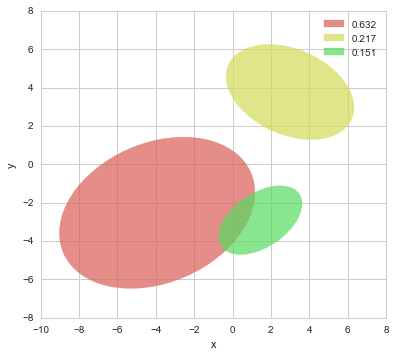

In [49]:
plot_gmm_ellipses(gmm)

## 5.2 Goodness-of-fit statistics

In [50]:
gof_df(gmm_pdf_result, kde_result)

,R_square,K_S,Chi_square,MSE,RMSE / Max,RMSE / Mean
0,0.978,0.027,0.124,6.247843e-08,0.024,0.245


In [51]:
X = Y = PLOT_AXIS_RANGE
pdf_Z = generate_Z_from_X_Y(X,Y, mixed_model_pdf)# passing a function as an argument

def residule_between_kde_and_gmm(points):
    kde_vals = exp(kde.score_samples(points))
    gmm_vals = mixed_model_pdf(points)
    return kde_vals - gmm_vals 

residual_Z = generate_Z_from_X_Y(X,Y, residule_between_kde_and_gmm)

plot_3d_prob_density(X,Y,pdf_Z)
plot_3d_prob_density(X,Y,residual_Z)
align_figures()

fig = plt.figure(figsize=(4,3))
plot_2d_prob_density(X,Y,kde_Z,xlabel='x',ylabel='y')
fig = plt.figure(figsize=(4,3))
plot_2d_prob_density(X,Y,pdf_Z,xlabel='x',ylabel='y')
fig = plt.figure(figsize=(4,3))
plot_2d_prob_density(X,Y,residual_Z,xlabel='x',ylabel='y')
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAUEAAAFBCAYAAADpDh0xAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsfXu4VGW9/2fu972BFBT1AYM0LAWBOt0wDHiOZl5KOIEZ
KZrakY4peZS8oAlCaenpJKdDVuYtCEVL6tgvIuCkHrkYKCikGGhqGoLs2XNbc1m/P2Z/3/3OO++6
zaw1M2vv9Xme/ey9Z9Za887MWp/1vX6+PlVVVXjw4MHDIIW/3Qvw4MGDh3bCI0EPHjwMangk6MGD
h0ENjwQ9ePAwqOGRoAcPHgY1PBL04MHDoIZHgh48eBjU8EjQgwcPgxoeCXrw4GFQwyNBDx48DGp4
JOjBg4dBDY8EPXjwMKjhkaAHDx4GNTwS9ODBw6CGR4IePHgY1PBI0IMHD4MaHgl68OBhUMMjQQ8e
PAxqeCTowYOHQQ2PBD148DCo4ZGgBw8eBjU8EvTgwcOghkeCHjx4GNTwSNCDBw+DGh4JevDgYVDD
I0EPdVBVFZVKBaqqtnspHjw4jmC7F+Chs1CpVFAqlZDP5+Hz+djj8XgcgUCgjSvz4MEZeCTogSGX
yyGdTiMajcLv90NVVeRyOZTLZVQqFfj9fgSDQfbbI0UPAwEeCXqAqqool8soFosol8soFAqM9CqV
CgAwq7BUKkFVVRQKBfj9fgQCAY8UPbgaPtUL/AxqkPtbqVRQKBSQzWal2/l8PgQCAfbj9/eHk+kU
8kjRgxvhkeAgRqlUQrlcBgAUCgVkMhkAQCAQQCwWQ7lcRj6flyZIPFL0MFDgkeAghKqqNQSYzWZR
KBTY87FYDMFgsCYmGI/HmdtMPzyIFClmyJOioihQFAWxWAyRSMQjRQ8dBS8mOMhQqVRQLBYZofX2
9qJSqSAQCCASiei6w2TZAf1lNDwplkollEolAP1WYCAQYJYhka8XU/TQSfBIcJCAt+KIhIjwIpEI
4vE4IzAz4N1hOr5IikS4BPo7EAjA5/PpkmI4HK4p0fHgwSl4JDgIoCgKSqUSK3vJZDIoFovw+XxI
JBIIh8NNv4YeKfKWJ7nRvKVoRIqBQAChUMgjRQ+OwCPBAY5yuYzDhw+jVCohlUohk8mgUqkgGAwi
mUzWxO4IdoSJRVJUFAXhcJiRYaVSqbEU9UixWCwin8+jWCwiEAggHo97pOjBNngkOEAhur8AkE6n
AVQTH9Fo1BSJ0DaqqjZNOhT7E9dnlhQVRWFJl3w+71mKHmyBR4IDEHztH7mlQJXQkskkQqFQm1dY
XUswGLREirQd7S9aih4pemgEHgkOMFCWFqgmIjKZDCOOrq4u3QxsO0nDDCnS45lMxpT7TEkWjxQ9
6MEjwQECvdo/an9zEwnISJGKuen98JaiWLjt8/lqtqFEC1/P6JXkeAA8EhwQ4Gv/KpUKent7US6X
4ff7kUwmkcvlmCVlBhT/66Q6eiJwv98vLdwWC7hl3Sy8Qk44HGZCEUS2brpJeLAPHgm6HLz1pygK
s5ao9s/n83XMxW0nqRq5z1qkyIO3FKkY3CPFwQePBF0KRVGQy+WYa5fJZKAoCgAgkUggEom0eYX9
aAWZ6JEi3Sh4UuTdaN5S9Ehx8MEjQReChA2y2Syi0Sir/QsEAkgmk5qxLiNLbCBd5DwpRiIRVrhN
hKiqKrtpANrus0eKAx8eCboIYtcFAOTzeQBANBpFLBaTXpjexQpGYD6fD+VyGaFQCH6/33JMkUiR
to9Go4hGoyxD7cF98EjQJRBr/4j8ACCZTNrS+iYDXyw9EMDLfIVCIVYzKfY9G5EikWEgEGBJJ3ou
FAp5pOgieCToAlD/LVBNhPT29rKLORqN2k6AqqoOGNIzC7IUzZAin2yiMIRYkgP0EyeV43ik2Jnw
SLCDIdb+5XI5ZgGGw2EoimLpwrJCbJ1WItNq8KRINwVZ8baiKMwi5Au3eVKk2KM4n8Ujxc6AR4Id
CrH2L5PJMCWYZDLJAvt2l514qAeRGk+KRH6kzMNrKYqq27Q/EShPipTAEdW5PbQOHgl2IHjrj299
C4fDiMfj8Pv9NTp9RvDIzV7wnycpZYuWoh4pEtlRmKNQKCASidQUb3uWYuvgkWAHoVQqIZ1Ow+/3
M5Vnan2Lx+OIRCLswmjkAnGze9vJa5dZinqq2zwp8u+LtxRpG48UnYdHgh0COvnz+TxCoRAKhQLK
5XLTtX+NoNMJp9NhRnWbJ0UA7G/RUvRI0Xl4JNhmyHT/yNXlW9+agXextBdWVbf13OdSqeSRos3w
SLCNEGv/crkce86o9s+JE967iFoDLdVtAFJLUSYbRtsSKdL/wWCQxY2979McPBJsE/jaP37qG1DN
GjpR/NyImztQi6U7DaLqtt7QKhkpVioV5PN5NiqVtxSpO8YjRTk8EmwxxNq/fD7PLMBoNIp8Pu9Y
7Z+HfjRLCLzCtd3HsTrJTyQ4maXokaI2PBJsIUT3t7e3F6VSicneB4PBmnY4PVg5ga2e7FTk6xFs
Z8AMKRJKpRKy2ayu+yxO8qMi7sFKih4Jtgi89ce3voVCISQSCVZrBrTfuiNhVqCfQIkUB+uF0kmQ
kWKxWGQWn9HQKjHRUigUWNE2n2gZLPBI0GFQ7V8gEEA4HK5pfWt17Z/RtkTSqqrWKKcA1eC9oihS
GXsP7QXVKAJgohBWJ/kBYDOfe3p6UKlUkEqlBsUoAo8EHQT1jZKcez6fr5G9p0C4CDPEZjf5FAoF
pkpN7nmlUkGhUGC9sTIpL1EgwCNFa7ArtsijkUl+PCmSu00Zat59HoiWokeCDkBGFlTGEA6HkUgk
WkoWeq9FA4zIlVJVtcY6oN+hUAjBYNBQXUXmdg1EtDtkYQVWSZFAxfr8JD9VVQccKXokaDP45AeA
mto/M7L3VsmxmYuRSnP4zpTDhw/rSmnpqauQ5cC3h1HJxkBFp1i+VixKs+NNKWwjC4EMJFL0SNBG
EBHQSSXW/pmd++EUafDH5d3fRjtTzPTM8taFoihMf8/rcOgciKRIgh1ibJFglhTFOGWnwiNBGyDW
/hUKBWSzWQBVgqHsmxnYvZ1srbwwg5F1aqVYWquUQ1EU1hZYLBZrYlG8jNRgJEUnYoJ2wOfzsfPC
6nhTnhQzmQwCgQDi8TieeeYZDB8+HOPHj2/X25Ji4AZtWgR+5gTV/mWzWZZciMfjAOzN4lrdli9z
6enpQaFQQCAQQHd3dx0B2h2gp8QJULUIotEoK9YlgszlcshkMsjlcjWE6QQGqmvuJJmSpUgeA1U1
kB4iiTzIvkfaX1VVbN68Gfv37zf1XhYtWoTZs2dj7ty5eP3112ueX79+PWbOnInZs2dj9erVNc/t
2LEDX/7yl9n/r732Gi644AJceOGFuPXWW6Wv55FgEyiVSqwBvlQqoaenB8ViEcFgEN3d3QiHwx11
h6fsdCQSQVdXV8viNnyShb+YEokEotGo9GLKZrPI5/MoFouWBsdbXZOHehjVg1L4IxqNIpFIaJIi
xRRLpRL++Mc/IpfLIRqNGr7+unXroCgKVq5ciQULFmDp0qXsuVKphGXLluG+++7DAw88gFWrVuHg
wYMAgHvvvRc33nhjTQhm6dKluOaaa/Dggw+iUqlg3bp19e/H9CfjgaFYLCKdTqNQKDDhg3Q6jUql
glgshlQqVZcZNWuB2N0JQjEaQiKRMMxOt6oomkhRdjEBYOUZ2WyWhRcok9luDFSLshFokSLdZP/y
l7/g2muvxerVq3H99ddj/vz5ePTRRzU/w23btmHKlCkAgPHjx2Pnzp3sub1792LUqFFIJpMIhUKY
NGkStmzZAgAYNWoU7rnnnppj7dq1C5MnTwYAnHbaaXjmmWfq19/8RzC4UKlUkMvl0NvbC0VRkE6n
kcvl4Pf7kUq

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAARYAAADZCAYAAADlhB+aAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzt3X9UVHX+P/AnzC+Qwfi6mal4oCbW1AgUKk62nHaVVc+n
/AVjQMz4g12tTp2z/kpMBSyRdhdjz0a0tbpbQin+qMOpz7dt9Zh4MjdhlHEhoRMUKLYsLu43figw
w/3+QXecGebemWHeM3NneD3O2bMwd+77vkedZ+/7vu97XyEcx3EghBCGQv3dAUJI8KFgIYQwR8FC
CGGOgoUQwhwFCyGEOQoWQghzcn93gBDiGY7jUFhYiObmZiiVShQVFWHGjBmW7adOnUJ5eTnkcjnS
09Oh1Wot24xGI0pKSlBRUQEAaG9vR15eHkJDQxEXF4eCggIAQFFRES5cuICIiAgAQHl5OdRqtWin
CCEB7O9//zuXl5fHcRzH1dfXc88++6xl29DQEJeWlsb19PRwg4ODXHp6Ovef//yH4ziO+/Of/8w9
8cQT3FNPPWV5/zPPPMPV1tZyHMdx+fn53IkTJziO47isrCzuxo0bLveJToUICXAGgwE/+9nPAAAJ
CQloaGiwbGtpaUFMTAzUajUUCgWSkpJQW1sLAIiJicEbb7xh01ZjYyOSk5MBAKmpqTh37hw4jkNb
Wxvy8/ORlZWF48ePO+0TnQoREuB6e3sRGRlp+V0ul2N4eBihoaGjtkVERKCnpwcAkJaWho6ODsF2
+ffevHkTOp0Oa9euhclkgl6vR3x8PH76058K7huwwWIwGPzdBUJEJSUlufS+CydOgJs0SXC7UqlE
fHy84Ha1Wo2+vj7L73yo8Nt6e3st2/r6+jBx4kTBtvj9rN8bHh4OnU4HlUoFlUqFlJQUNDU1BWew
AMCWLVFO39PT02OT2N7g7WMEw2fwxTGk9BlKSv7rcpvcpEmI2rJFcPt/S0pE9583bx4+++wzLF68
GPX19TZfeI1Gg7a2Nvzwww8ICwtDbW0tcnNzbY9vdbvgrFmzUFtbi4ceeghnzpxBSkoKWltbsXHj
RlRXV8NkMsFgMGDlypWifQroYCGEjJzSnD17FpmZmQCA4uJifPzxx7h58ya0Wi22b9+OdevWgeM4
aLVa3HXXXTb7h4SEWH7etm0bdu3ahaGhIWg0GixevBghISFYvnw5tFotFAoFVqxYAY1GI9qnEI4L
zLubDQYDjVjoGD5t351jlJT81+VTIYPB4HTE4mpbUkFXhQghzFGwEEKY81uwGI1G6HQ6AMDly5eR
mpoKvV4PvV6PTz75xF/dIoQw4JfJ2/3796O6utqyPLihoQHr1q3DmjVr/NEdQghjfhmx2K/4a2xs
xOnTp5GTk4MdO3agv7/fH90ihDDil2BJS0uDTCaz/J6QkIAXX3wRlZWVmDFjBl5//XV/dIsQwogk
1rEsXLjQcgkvLS0Ne/bscWk/fmkyq/d5wtvHCIbP4ItjBMNnCAaSCJbc3Fzs2rUL8fHxOHfuHObM
mePSfq6sJ5DS2gapth8sx5DWZ3B95W0wkkSwFBYW4pVXXoFCocDkyZPx8ssv+7tLhBAP+C1Ypk+f
jsOHDwMAZs+ejUOHDvmrK4QQxmiBHCGEOQoWQghzFCyEEOYoWAghzFGwEEKYo2AhhDBHwUJIgOM4
DgUFBcjMzIRer8eVK1dstp86dQoZGRnIzMzE0aNHRff56quvoNVqkZOTY7MC/siRI0hPT0dmZiZO
nz7ttE8ULIQEuJMnT2JwcBCHDx/G5s2bUVxcbNlmMpnw6quv4p133kFFRQWqqqrQ3d0tuM+uXbuw
c+dOVFZWQq1W46OPPsL169ct++7fvx/79u3D0NCQaJ8oWAgJcO7UFUpOTsb58+dH7dPY2AgA6Ozs
REJCAoCRh3TX1dXh0qVLSEpKglwuh1qtRmxsLJqbm0X7RMFCSIATqivkaNuECRPQ09ODvr4+m9dl
MhmGh4cxY8YM1NXVAQA+++wz3Lp1S7ANMZK4V4iQca+jfsy7ultX6I477hDcZ+/evSgqKoLZbEZS
UhJUKhUiIyPdqk0EULAQIgmajYmC25yV5nOnrlBdXZ2lrpCjfWpqarBv3z7ccccd2LNnD1JTUzF7
9myUlpZicHAQAwMDaG1tRVxcnGifKFgICXDu1BXKyMjAXXfd5XAfYOTpjqtXr0Z4eDgeeeQRpKam
AgB0Oh2ys7PBcRw2bdoEpVIp2ieqK8TA+HrOiHSPIaXP4G5doaTzwnWFDA9TXSFCCKFgIYSwR8FC
CGFOEgXL2tvbkZ2djZycHOzevdtfXSKEMOKXYNm/fz927txpWRZcXFyMTZs2obKyEsPDwzh58qQ/
ukUIYUQyBcuSk5MBAKmpqTh37pw/ukUIYUQSBcusr3hHRERQ3RZCApwkFsjxy48B15YL86hgGR3D
1+376hiBThLBMnv2bNTW1uKhhx7CmTNnkJKS4tJ+VLCMjuHL9t07BhUs87tt27Zh165dGBoagkaj
weLFi/3dJUKIByRRsCw2NhYVFRX+6gohhDFaIEcIYY6ChRDCHAULIYQ5ChZCCHMULIQQ5iRxuZkQ
MnYcx6GwsBDNzc1QKpUoKirCjBkzLNtPnTqF8vJyyOVypKenQ6vVCu6zadMmXL9+HRzHoaOjA3Pn
zsW+ffuwZ88eXLx4EREREQCA8vJyqNVqwT5RsBCP1E+aBgBI7L7m556MX9Y1goxGI4qLi1FeXg7g
dl2hDz74ACqVCllZWViwYAEMBoPDfV577TUAwA8//IDVq1fjpZdeAjBSyOzAgQOIinL+1EaAgoW4
iA8Qe4lzw1F/8eao7RQ0vuNqXSEAlrpC9fX1gvsAwB//+Efk5OTgJz/5CTiOQ1tbG/Lz89HV1YWM
jAykp6eL9omChTg0Kijmhgu+136bddBQwHifUF2h0NBQl+sKWe/T3d2NL7/8Ejt27AAA9Pf3Q6fT
Ye3atTCZTNDr9YiPj7epBmCPgoVYWIeJWJA4w+/LBwyFi3NmzjjmfVnWFQKAv/3tb3jiiScQEhIC
AAgPD4dOp4NKpYJKpUJKSgqampooWIgwPkxMd5iQ7EGYOGJ/mqTpES/LOZ7d2pAsvNFJLTOWdYUA
4Ny5c3juuecsv3/77bfYuHEjqqurYTKZYDAYsHLlStE+UbCMQ45Oc7z1KADr0UtztAbJ/+/fXjnO
eMayrhAAfPfddzZXlTQaDZYvXw6tVguFQoEVK1ZAo9GI9onqCjEQKI8DEDvV8cWfU11dD+QyuddO
jaT0d+1uXaH7E7cLbm+qLw64ukI0YhkHWM2deGrmTKDlG9C8yzhAwRLEWAVKw7K+Ua89UB0xpras
510oXIIXBUuQslzuHUOgOAqSuTG3f77YNvo97gQNhUvwk1SwrFy50rKQJzo6Gnv37vVzjwLPWAOl
NZODTD4SFtYh4oj9duugcTVgKFyCm2SCZXBwEABw8OBBP/ckMI01UCwjD5PzQBHC7+duwFC4BC/J
3N3c1NSE/v5+5ObmYs2aNTAax75gaLzxNFTmxgAz7+r3uB9zY26HjKPTKUcS54aPBMykaYK3DZDA
I5lgCQsLQ25uLg4cOIDCwkJs2bIFw8PD/u6WpPFfRv7L6Q7rUGHN3XABrNa7ULgEBcmcCsXGxiIm
Jsbyc1RUFLq6ujBlyhTBfcZzXaHmaA1gNmHmTPeO3Zo5smxp5qT+H9sVPoYn7ps08v/G/zEDAO49
HOL0GJr7gOZmoO6OuzDzasuYjhsMf9fBQDLBcvz4cXz99dcoKChAZ2cn+vr6MHnyZNF9xmNdIf6/
6GNZft+wrA8y8CMK2/46+gyzJlSKtne5P8fpMZMjR+Ze2nKAmMphp39Oyckjq3RbYma6Pe8irb9r
qiskCRkZGdi

In [52]:
def f(V,theta):
    return (mixed_model_pdf([[V*cos(theta),V*sin(theta)]]))*V

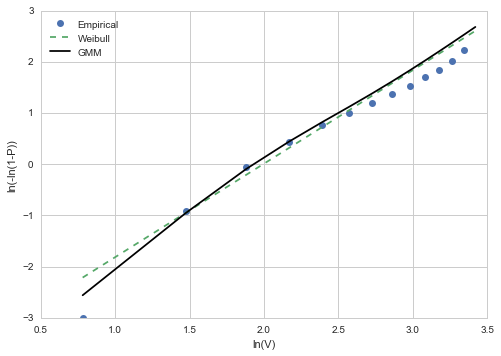

In [53]:
x = linspace(0, max_speed, 15)

# 1. Plot v-p points, empirical distribution
ecdf = sm.distributions.ECDF(df.speed)
y = ecdf(x)
plot(log(x), log(-log(1-y)),'o', label = 'Empirical')

# 2. Weibull distribution
weibull_params = sp.stats.exponweib.fit(df.speed, floc=0, f0=1)
y_cdf_weibull = sp.stats.exponweib.cdf(x, *weibull_params)
plot(log(x), log(-log(1-y_cdf_weibull)),'--', label = 'Weibull')

# 3. GMM distribution
y_ = [integrate.nquad(f, [[0, x_val],[0, 2*pi]]) for x_val in x]
y = array(zip(*y_)[0])
plot(log(x), log(-log(1-y)),'-', color='black', label = 'GMM')

plt_configure(xlabel='ln(V)',ylabel='ln(-ln(1-P))',legend={'loc':'best'})

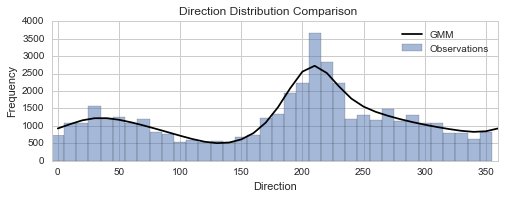

In [54]:
# Calculate Angle Distribution
x = linspace(0,2*pi, num=36+1)
y_ =[integrate.nquad(f, [[0, inf],[x_-pi/36, x_+pi/36]]) for x_ in x]

# 1. integrate.nquad returns 2 vaule, result, abserr. Need to abstract the first to plot
# 2. * length of data size, to adjust the plot space
y = array(zip(*y_)[0])*len(df['dir']) 

df['dir'].hist(bins=DIR_BIN, alpha=0.5, label='Observations')
plot(x/pi*180, y,'-', color='black', label='GMM')
plt_configure(title='Direction Distribution Comparison',
              xlabel='Direction',ylabel='Frequency', legend={'loc': 'best'} ,tight='xtight',figsize = (8,2.5))
dir_fig = plt.gcf()

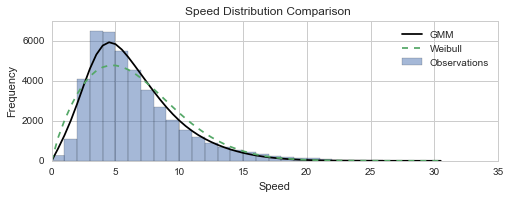

In [55]:
# Calculate Speed Distribution
# 1. GMM Model
x = arange(0, max_speed, 0.5)
y_ =[integrate.nquad(f, [[x_-0.01, x_+0.01],[0, 2*pi]]) for x_ in x]
y = array(zip(*y_)[0])*len(df.speed)/0.02
plot(x, y,'-', color='black', label='GMM')

# 2. Observation
df['speed'].hist(bins=arange(0, df.speed.max()), alpha=0.5, label='Observations')

# 3. Weibull
y_weibul = sp.stats.exponweib.pdf(x, *weibull_params)* len(df.speed)
plot(x, y_weibul, '--', label='Weibull')   

plt_configure(title='Speed Distribution Comparison',
              xlabel='Speed',ylabel='Frequency',legend=True, figsize=(8, 2.5))
plt.gca().set_ylim(bottom = 0)
plt.locator_params(axis='y', nbins=5)

## 5.3 Sectoral Comaprison

In [56]:
# Calculate Speed Distribution
def model_data_comparison(df, original_incre = 10, incre = 10):
    start, end = -original_incre/2 + incre/2, 360
    max_diff_array = []
    max_speed = df.speed.max()
    
    # Find a max count for plotting histogram
    max_count = max_count_for_angles(df, start, end, incre)
    plot_range = [0, max_speed, 0, max_count*1.05]
    
    for angle in arange(start, end, incre):
        angle_radian, incre_radian = radians(angle), radians(incre)  
        start_angle, end_angle = angle-incre/2, angle+incre/2
        
        # Select data from observation
        sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)
        direction_prob = integrate.nquad(f, [[0, inf],
                                             [angle_radian-incre_radian/2, angle_radian+incre_radian/2]])
        weibull_params = sp.stats.exponweib.fit(sub_df.speed, floc=0, f0=1)
        
        fig = plt.figure(figsize=(14,2))
        x = linspace(0, sub_max_speed, 20)
        # 1. Frequency Comparison
        ax1 = fig.add_subplot(1,3,1)        
        # 1.1. Data Histogram
        sub_df['speed'].hist(bins=arange(0, sub_df.speed.max()), alpha=0.5, label='Data')             
        # 1.2. Model Distribution
        y_ =[integrate.nquad(f, [[x_-0.1, x_+0.1],
                                 [angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
                                 for x_ in x]
        y = array(zip(*y_)[0])/direction_prob[0] * len(sub_df.speed)/0.2
        plot(x, y,'-', color='black', label='GMM')
        # 1.3 Weibull Distribution
        y_weibul = sp.stats.exponweib.pdf(x, *weibull_params)* len(sub_df.speed)
        plot(x, y_weibul, '--', label='Weibull')   
        plt_configure(xlabel = "V", ylabel='Frequency')
        if angle == start: plt.legend() 
        plt.axis(plot_range)
        
        # 2. CDF Comaprison
        ax2 = fig.add_subplot(1,3,2)
        # 2.1. Empirical distribution
        ecdf = sm.distributions.ECDF(sub_df.speed)
        y_ecdf = ecdf(x)
        # 2.2. Model
        y_ =[integrate.nquad(f, [[0, x_val],
                                  [angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
             for x_val in x]
        y_cdf_gmm = array(zip(*y_)[0])/direction_prob[0]
        # 2.3 Weibull
        y_cdf_weibull = sp.stats.exponweib.cdf(x, *weibull_params)
        plot(x, y_ecdf,'o', label='Data')
        plot(x, y_cdf_gmm,'-', color='red', label='GMM')
        plot(x, y_cdf_weibull,'--', label='Weibull')
        plt.gca().set_xlim(right = max_speed)
        plt_configure(xlabel = "V", ylabel='P')
        if angle == start: plt.legend() 
        
        # 3. Weibull Comparison
        ax3 = fig.add_subplot(1,3,3)
        plot(log(x), log(-log(1-y_ecdf)),'o',label='Data')
        plot(log(x), log(-log(1-y_cdf_gmm)),'-', color='red',label='GMM')
        plot(log(x), log(-log(1-y_cdf_weibull)),'--', label='Weibull')
        plt_configure(xlabel="ln(V)", ylabel="ln(-ln(1-P)")
        plt.gca().set_xlim(right = log(max_speed+2))
        plt.locator_params(nbins=5)
        if angle == start: plt.legend(loc='best') 
        
        title = '%s (%s - %s) Degree' % (angle, start_angle, end_angle)
        plt.suptitle(title,y=1)
        
        diff = abs(y_ecdf - y_cdf_gmm)
        diff_weibull = abs(y_ecdf - y_cdf_weibull)
        max_diff_array.append([len(sub_df), angle, diff.max(), x[diff.argmax()], 
                               diff_weibull.max(), x[diff_weibull.argmax()]])
        
        plt.show()
        print 'data size:', len(sub_df)
        print 'max diff:', diff.max(), ', speed value:', x[diff.argmax()], 'y gmm', y_cdf_gmm[diff.argmax()]
    return max_diff_array

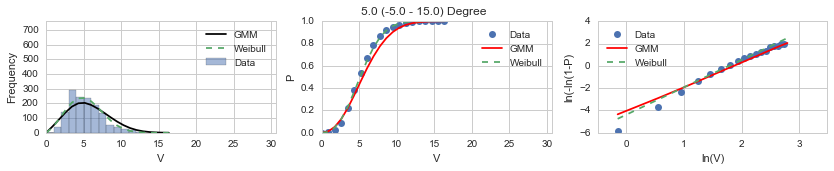

data size: 1426
max diff: 0.104993808989 , speed value: 6.88134748639 y gmm 0.684627509384


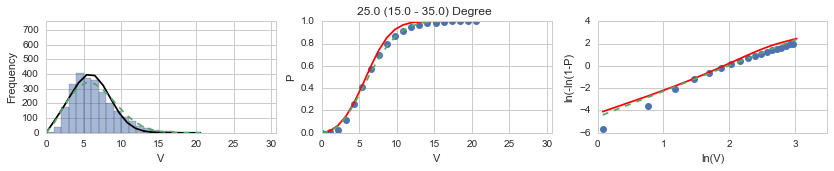

data size: 2643
max diff: 0.0599169650031 , speed value: 9.73953050955 y gmm 0.925978258987


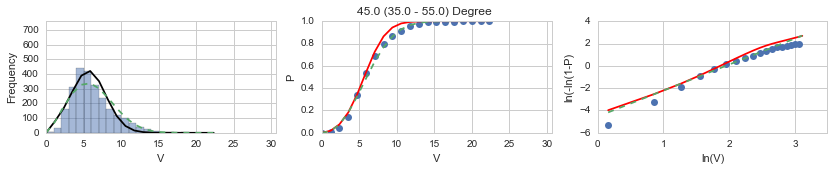

data size: 2483
max diff: 0.0804890512724 , speed value: 9.39994980043 y gmm 0.943557919577


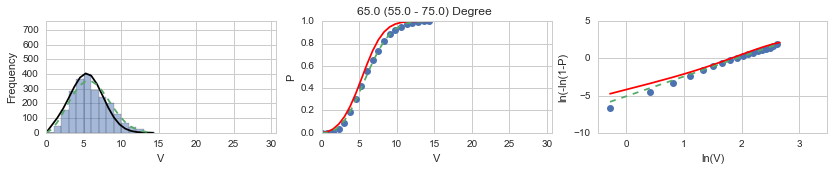

data size: 2271
max diff: 0.0965251296245 , speed value: 7.53421023693 y gmm 0.833205006331


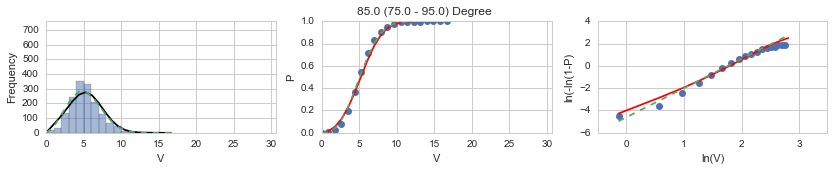

data size: 1593
max diff: 0.0657991883695 , speed value: 6.12054578349 y gmm 0.653598175096


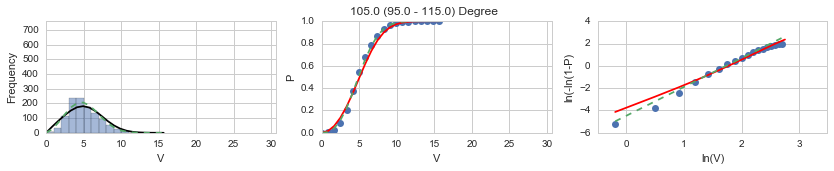

data size: 1130
max diff: 0.0651442682905 , speed value: 5.7697216334 y gmm 0.615386705161


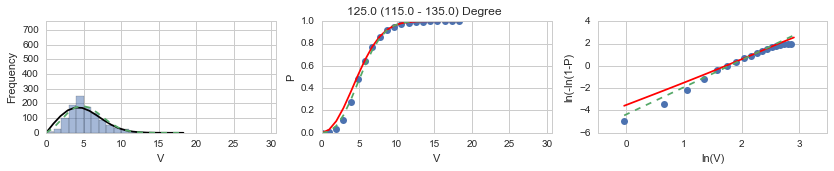

data size: 1107
max diff: 0.109505879045 , speed value: 2.88778415168 y gmm 0.222423674889


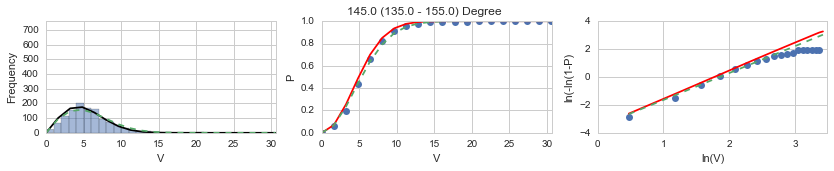

data size: 1207
max diff: 0.0567693024995 , speed value: 3.21475885115 y gmm 0.253952401091


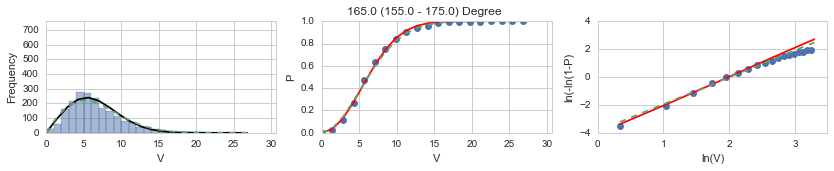

data size: 1989
max diff: 0.0298462379973 , speed value: 5.63541479249 y gmm 0.441244762505


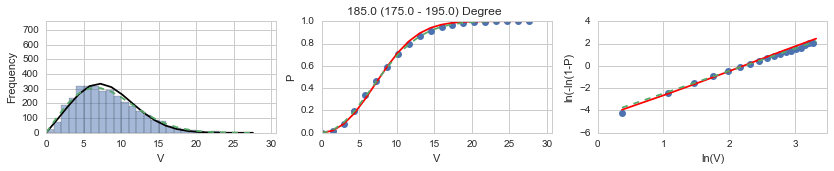

data size: 3301
max diff: 0.0305746477633 , speed value: 14.4963420316 y gmm 0.940601912229


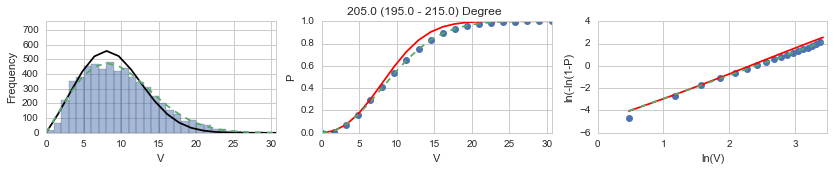

data size: 5904
max diff: 0.0774274819333 , speed value: 12.8854144743 y gmm 0.830306885727


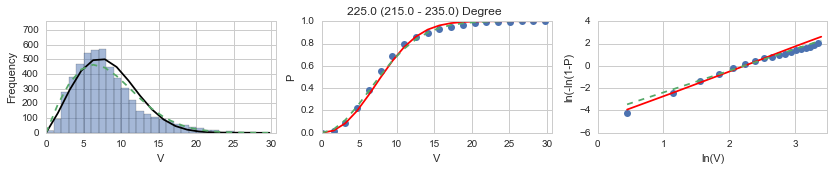

data size: 5085
max diff: 0.0589896030306 , speed value: 7.83049351653 y gmm 0.495386011522


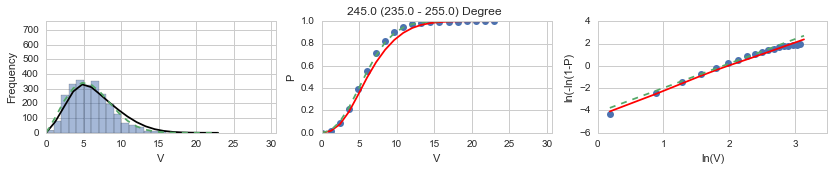

data size: 2509
max diff: 0.0837003917918 , speed value: 7.233525027 y gmm 0.63252121044


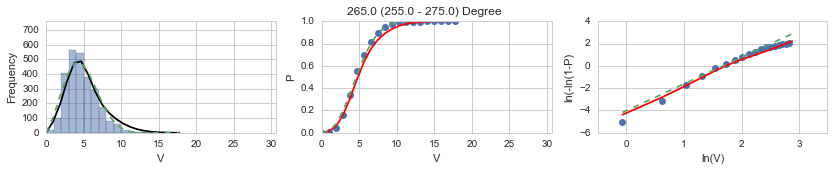

data size: 2663
max diff: 0.0773043856355 , speed value: 4.67033647835 y gmm 0.475455659426


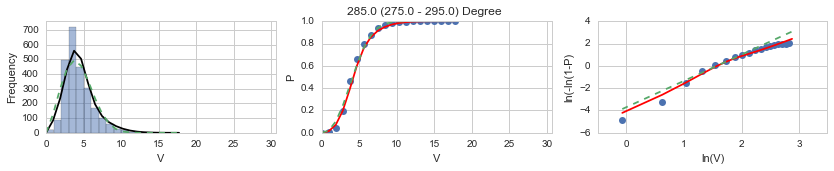

data size: 2465
max diff: 0.0753494693539 , speed value: 3.72891340069 y gmm 0.390776291295


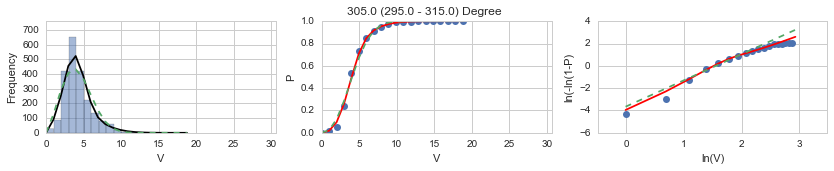

data size: 2145
max diff: 0.0432505389977 , speed value: 1.97429619996 y gmm 0.094998790746


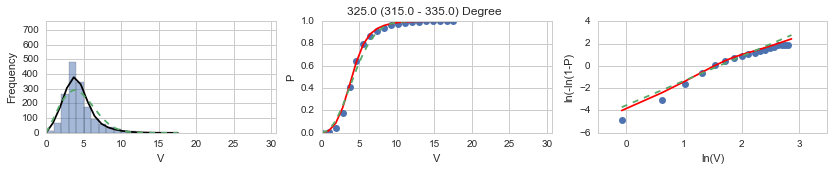

data size: 1601
max diff: 0.0472811592223 , speed value: 2.76932729612 y gmm 0.223421071777


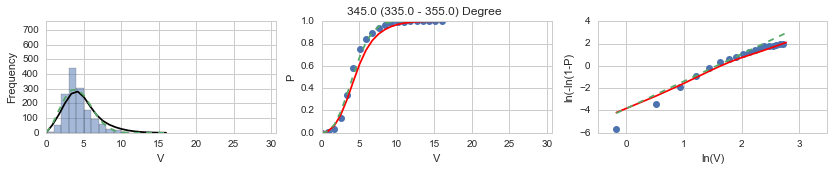

data size: 1443
max diff: 0.138474021349 , speed value: 5.04667249578 y gmm 0.616896734022


In [57]:
if len(effective_column) == 16:
    max_diff_array = model_data_comparison(df, SECTOR_LENGTH, 22.5)
else: 
    max_diff_array = model_data_comparison(df, SECTOR_LENGTH, 20)

In [58]:
diff_df = pd.DataFrame(max_diff_array,columns=['datasize','direction', 'gmm', 'speed_gmm',
                                               'weibull', 'speed_weibull'])
def nominal_avg_and_weight_avg(df_weight, df_value):
    return np.average(df_value), np.sum(df_weight / df_weight.sum() * df_value)

_, gmm_mean = nominal_avg_and_weight_avg(diff_df.datasize, diff_df.gmm)
_, weibull_mean = nominal_avg_and_weight_avg(diff_df.datasize, diff_df.weibull)

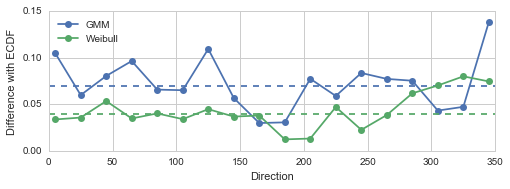

In [59]:
line, = plot(diff_df.direction, diff_df.gmm, '-', label = 'GMM', marker='o')
plt.axhline(gmm_mean, linestyle='--', color = line.get_color())
line,= plot(diff_df.direction, diff_df.weibull, '-', label = 'Weibull', marker='o')
plt.axhline(weibull_mean, linestyle='--', color = line.get_color())
plt_configure(xlabel='Direction', ylabel='Difference with ECDF', 
              legend={'loc':'best'},figsize=(8,2.5))
plt.locator_params(axis='y', nbins=5)

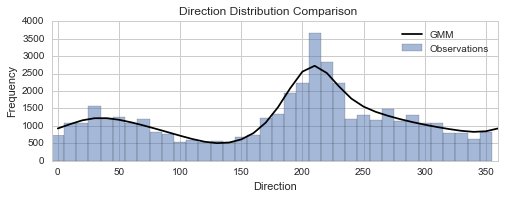

In [60]:
# Compare direction weight with previous figure
dir_fig

In [61]:
diff_df

,datasize,direction,gmm,speed_gmm,weibull,speed_weibull
0,1426,5.0,0.104994,6.881347,0.033704,2.580505
1,2643,25.0,0.059917,9.739531,0.035738,7.575190
2,2483,45.0,0.080489,9.399950,0.053482,7.049962
3,2271,65.0,0.096525,7.534210,0.034758,6.027368
4,1593,85.0,0.065799,6.120546,0.040192,6.120546
5,1130,105.0,0.065144,5.769722,0.034043,4.945476
6,1107,125.0,0.109506,2.887784,0.044762,2.887784
7,1207,145.0,0.056769,3.214759,0.036791,3.214759
8,1989,165.0,0.029846,5.635415,0.037928,7.044268
9,3301,185.0,0.030575,14.496342,0.012276,5.798537


### 5.3.1 Variability over the years

345.0 (335.0 - 355.0) Degree Speed Distribution


(0, 0.35000000000000003)

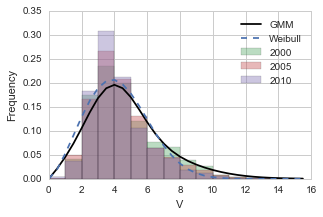

In [62]:
max_diff_element = max(max_diff_array, key=lambda x: x[2])
angle =  max_diff_angle = max_diff_element[1]
incre = 20

# Select data from observation
start_angle, end_angle = angle-incre/2, angle+incre/2
angle_radian, incre_radian = radians(angle), radians(incre)  
sub_df, max_speed = select_df_by_angle(df, start_angle, end_angle)
weibull_params = sp.stats.exponweib.fit(sub_df.speed, floc=0, f0=1)

x_vals = arange(0, max_speed, 0.5)

# 1. GMM
y_vals_ =[integrate.nquad(f, [[x_val-0.01, x_val+0.01],
                              [angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
          for x_val in x_vals]
direction_prob = integrate.nquad(f, [[0, inf],
                                     [angle_radian-incre_radian/2, angle_radian+incre_radian/2]])
y_vals = array(zip(*y_vals_)[0])/direction_prob[0] /0.02
plot(x_vals, y_vals,'-', color='black', label = 'GMM')

# 2. Weibull
y_weibull = sp.stats.exponweib.pdf(x_vals, *weibull_params)
plot(x_vals, y_weibull,'--', label='Weibull')

# 3. Data
for start_time in xrange(20000000, 20150000, 50000):
    end_time = start_time + 50000 
    df_other_years = df_all_years.query('(date >= @start_time) & (date < @end_time)')
    df_other_years_at_angle, _ = select_df_by_angle(df_other_years, start_angle, end_angle)
    if len(df_other_years) > 0 :
        df_other_years_at_angle['speed'].hist(bins=arange(0, max_speed), normed=True,alpha=0.4,
                                              label=str(start_time//10000))

print '%s (%s - %s) Degree Speed Distribution' % (angle, start_angle, end_angle)
plt_configure(xlabel='V',ylabel='Frequency',legend=True, figsize=(4.7,3))
plt.gca().set_ylim(bottom = 0)

In [63]:
fig1,ax1 = plt.subplots(figsize=(4.7,3))
fig2,ax2 = plt.subplots(figsize=(4.7,3))

x = linspace(0, max_speed, 20)
    
# 1. GMM    
y_ =[integrate.nquad(f, [[0, x_val],
                         [angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) for x_val in x]
direction_prob = integrate.nquad(f, [[0, inf],
                                     [angle_radian-incre_radian/2, angle_radian+incre_radian/2]])
y_gmm = array(zip(*y_)[0])/direction_prob[0]
ax1.plot(x, y_gmm,'-', color='black', label='GMM')
ax2.plot(log(x), log(-log(1-y_gmm)),'-', color='black',label='GMM')

# 2. Weibull
y_weibull = sp.stats.exponweib.cdf(x, *weibull_params)
ax1.plot(x, y_weibull,'--', label='Weibull')
ax2.plot(log(x), log(-log(1-y_weibull)), '--', label='Weibull')

# 3. Data
for start_time in xrange(20000000, 20150000, 50000):
    end_time = start_time + 50000 
    df_other_years = df_all_years.query('(date >= @start_time) & (date < @end_time)')
    df_other_years_at_angle, _ = select_df_by_angle(df_other_years, start_angle, end_angle)
    if len(df_other_years_at_angle) > 0 :
        ecdf = sm.distributions.ECDF(df_other_years_at_angle.speed)
        y_cdf = ecdf(x)
        
        ax1.plot(x, y_cdf,':', label = start_time//10000)
        ax2.plot(log(x), log(-log(1-y_cdf)),':', label = start_time//10000)
       
plt_configure(ax=ax1, xlabel='V',ylabel='P',legend={'loc':'best'})
plt_configure(ax=ax2, xlabel="ln(V)", ylabel="ln(-ln(1-P)",legend={'loc':'best'})
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAT4AAADZCAYAAAC5Dly+AAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzt3XdcldUfwPHPHdzL3iKigojinrgVF5KaKweJmppZObKf
uXKvHGhmpaktzV9Oyl+We+TeiYgiKDjACbIEGV7Gvff5/UFeJcuRXi7jvF+vXvHM833g+r3nPM95
zpFJkiQhCIJQishNHYAgCEJhE4lPEIRSRyQ+QRBKHZH4BEEodUTiEwSh1BGJTxCEUsfoie/8+fMM
HDjwifUHDhygT58+BAYGsmnTJmOHIQiCYKA05slXrlzJli1bsLKyKrBeq9WyYMECNm/ejFqtpl+/
fvj5+eHo6GjMcARBEAAj1/g8PDxYvnz5E+uvXbuGh4cH1tbWmJmZ4ePjQ0hIiDFDEQRBMDBq4vP3
90ehUDyxPjMzExsbG8OylZUVGRkZxgxFEATBwKhN3X9ibW1NZmamYTkrKwtbW9tnHhcaGmrMsARB
KKZ8fHxeaP9CSXx/fR3Yy8uLGzdukJ6ejrm5OSEhIQwdOvS5zvWiF/iqhYaGihiKQAwvUr5Wpyfx
3gPikrO4k5TJnaRM4pOzmPVuMxSKJxs9vSduI1erRw6YAw8AtUrBlyNbce1SIm1e8wZg9/Zj3Lmc
R66HIzKZDG1aJtnR8bi0qYEk0+Fh+4CI32IYtagf6TmZbD+wn+Sd96g1yI9M7X1ORx/A45SMau/3
Ii03hSNRW6l1whKvAY24ejeGkNQoGp2x55Aig/u5qdg1MKfWHzasijiK3kJHozdqUOWEmqBtX2Ht
asfro/vicdyM/0acwMJJTdM+DakcYs0PoXsxd1TTqHsNKv6hYunu77AsY0OH4T3xCFGzM+4yVk6W
eLevhOcFW47di8HcQU3ZuhZUvmjDhcwrKG1UWNV0ofIVGy4rdMgt5SjLQ6Xr9lzMTsKhrD1K50w8
79iTaZeLZCYjyzKPinftuGttgV4pkavOwi3BmiwnNXq5HjOLdMomWSArrwYFpOdlY5+kJMXeFp1M
T44+C+cUBTmutuhleszV6TgmyjCrZI8OPWm5GTgkyPBu1/CFPz+FkvhkMhkA27dvR6PREBAQwOTJ
k3nnnXeQJImAgABcXFwKIxShFBoyZy9pGTlPrL+TkAHZWtwrOwGQeDeDQ7ujmDeyJWozBVmpGo7u
jOL9sa1RKOTcvXWP8GPRtHnNm/TsDG7kXEF9KZnhY8aT8iCV2du+oG18Hr069+KeJo1pOz+l1910
JCmQjKwM9qcfpp9Sxunf47l6O5b0+nruXbzK3Dc+IyUjlZp9GhK8IZS477NQqJSUb+zJt8evACCT
y7Db68BhuSV2dnbYym1JP3qTkFwtQ4cOxcbWBttsW+za2TGvez1sbW3z//O1ZYDtW1haWmJhYYH5
f8wJMv8CtVptuA219CV/v0XhS/BFGT3xlS9fnuDgYAC6du1qWN+2bVvatm1r7OKFEk6SJGLj0jl2
/g7dfb2wt1EX2J6Xp6NpLVfytHrK2piTHZ9Ouy41KOdkRVZ6NutXh/CfqR0AUKsVpKVkUc3dAZlM
xgNbc67cu4RM35I8dJzJOEvdK7+izWyHmdqMo7owZjapC3o91mor3Mq5UjXAg21btxJ99TIPslMJ
unOZd9zduRN3Bzt3R364nlIgPrVajaurK7W9a1I2wY4GA/pTtmxZypYti6urK2WDHv1sY2NjqEQ8
ZOqkU1yZ5B6fILwMSZKIT81lzc6LHDsfR3xyFgBOdubUKWdnqME9yMxh2YKDTJjTEZlMRm6Ols9m
7MGjrA1yhRyVoyWNmlZAr9MhVyiwc7CkQcR6cpJqYu7iwqnEUDwyosi+m4BFhfJsu7KPSR8NAaWS
u7fj8bjpwLI7F4ju0oUrV65w/fp1puj1T8RbsWJF2rVth7e3N1WrVsXb2xsvLy/c3NywtbV9IpkJ
xicSn1DsrNsdxc/7EoFE1CoFreq50apeeWp7OvDNwkOMmtQeKxs1FlYqKlVxQpunw0ylRKVW8tH0
Dsjk+YlGrpBjuXMVmeWHYlujOufiI7H1bY4+O79ZfCDmOAGT30Pm6MTx48cpG2vJ2HVfcPLoCRIS
EgrEVLZsWVq0aFEguVWtWhUvLy8sLS0L+1ckPINIfEKx07CaC5GXb9GtbW1iTt2g42vVcXHN7x7V
pU9dHj5Kk8lkvPl24wLHJm3ZjJWHO86tWpKV+wB7vzboc/IT3eHrp6jV2htzSc/J4GBSLtxk+Lz3
OXMsBK1WazhH+fLl6dOnDxUqVCAgIIDatWs/V68EoegQiU8ociRJ4vfTN4mMSWFMv4JP7K5fS8ZR
bUZAKyd86rmRF59B/K00Q+Kr3aB8gf3Twi+Ql5ZGmda+AKjLupB5LQbnVi359dIeFBXltLR34Mcl
SzgSfoKloQuJOX/FcPzDDvbNmzc3/FexYkVA3F8rzkTiE4qU+OQslm06R/jVZMxVCob1rINSJkOl
zv+oJsSlc+dGGh418vdv26lageNzU1PJir2OQ8MG+Sv0euK27qBMa1/Oxl3gtM0dhg8eRGxsLDGH
LnL4wnH6r9plON7NzY3evXsbklzDhg0xNzcvlGsXCo9IfEKRoNNLbDt6jbW7osjN09Gkpisj+9Ql
/kYqxw9cZdCIFgDU9amAR2Un7ty9ajhW0umQ/dk1Q5uVxZWly2j8w/ek5qSzl1h6TZsEgOy+ntNR
Z1n5wVJDFwiFQkGHDh3o06cPnTp1wt3dXTxsKAVE4hOKhC2Hr7F6eyR2lmYENKzAm33qIpfLsbNS
ce70LXQ6PQqFHAtLFRaWKu7czT9On5vL2ZEfUn/J5yitrLiu0uA1/H0knQ4blRW7rh4ianc4vwVv
5vz58wAolUo6duxIQEAAPXr0wNnZ2YRXXvTdunWLRYsWkZiYiFqtxsLCgvHjx7Nr1y6+/vprvvrq
K8O+9+7do3Xr1sydO5fGjRvj5+fHuHHjeO+99wz7DB8+nAcPHrBmzRpTXA4gEp9QRHRuUYmU+xr6
tK/Kxq9PEnslBa9qZVAqFfQeWPA+2t09e5GU+R9duUqFY5MmaOLiUVf24KtTP9DLzZ8T8+fzv//9
j6u3Y8hOe4CZmRldunShT58+dO/eXYwE9Jyys7MZOXIk8+bNo27dugBcuHCBTz75hCZNmuDp6cmp
U6fw8/MDYMeOHbi5uRmOd3d3Z+/evYbEl5aWxs2bN03+ZSMSn2ByZ0/dwNbegvfeqANAn0E+2Dk8
6gIi6XToNBqU1tYAPLhxC21GOvi1R6fX4TgoACuVNb/++isX1p1i7ckVZCWko1ar6dSpE3369KFr
167Y29ub5PpelQkTJjwxdmVubi4qlepfnzMgIIBFixb94/YDBw7QrFkzQ9IDqFOnDmvWrGHZsmV0
7tyZPXv2GLYdOnSIdu3aGZYdHBxwcHAgJiaGypUrs2vXLjp37mzy0ZhE4hMKVXaulnv3synnbGW4
l2ZhacYfR2KoUj3/tUWXcgW7hsRt34Hm9h2qfDACgAoBvbgXEQHA8RtnWH/qfxyds4NLly4hk8no
3r07gYGBdOnSpcAoQMKLu337Nh4eHoblkSNHkpGRQVJSEo0bN6ZWrVqo1Wpu376NXq+nXLlyqNUF
357p0qULO3bs4MMPP2T//v2MGzdOJD6h9Ai/msRXP59DpZfwsbNkyActkcllVK9dDq9qj97Vzk5I
JPn4CSr0egMA51atiN+x07Bdb21BjlzON998w8JPF2JR35GYm7EMGTKESZMm4e3tXejXVhgWLVr0
RO3M2F1qypUrR8SfXzIAK1asAKBv375otVpkMhktWrRgx44d5OXl0a1bN44dO2bYXyaT0aFDB/r3
70+vXr0oU6b

### 5.3.2 Bootstrap, to see the variability of each sector

In [64]:
FRACTION = 0.5 

345.0 (335.0 - 355.0) Degree Speed Distribution


(0, 300.0)

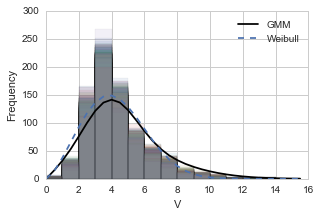

In [65]:
x_vals = arange(0, max_speed, 0.5)

# 1. GMM
y_vals_ =[integrate.nquad(f, [[x_val-0.01, x_val+0.01],
                              [angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
          for x_val in x_vals]
direction_prob = integrate.nquad(f, [[0, inf],
                                     [angle_radian-incre_radian/2, angle_radian+incre_radian/2]])
y_vals = array(zip(*y_vals_)[0])/direction_prob[0]/0.02 *len(sub_df.speed)*FRACTION
plot(x_vals, y_vals,'-', color='black', label='GMM')

# 2. Weilbull 
y_weibull = sp.stats.exponweib.pdf(x_vals, *weibull_params)*len(sub_df.speed)*FRACTION
plot(x_vals, y_weibull,'--',label='Weibull')

# 3. Data Resampled
for i in xrange(1,100):
    sub_df_resampled = sub_df.sample(frac=FRACTION, replace=True)
    sub_df_resampled['speed'].hist(bins=arange(0, max_speed), alpha=0.1)
    if i == 1: plt_configure(xlabel='V',ylabel='Frequency',legend=True, figsize=(4.7,3))

print '%s (%s - %s) Degree Speed Distribution' % (angle, start_angle, end_angle)
plt.gca().set_ylim(bottom = 0)

In [71]:
fig1,ax1 = plt.subplots(figsize=(4.7,3))
fig2,ax2 = plt.subplots(figsize=(4.7,3))

# 1. GMM
x = linspace(0, max_speed, 20)
y_ =[integrate.nquad(f, [[0, x_val],[angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) for x_val in x]
direction_prob = integrate.nquad(f, [[0, inf],[angle_radian-incre_radian/2, angle_radian+incre_radian/2]])
y_gmm = array(zip(*y_)[0])/direction_prob[0]

ax1.plot(x, y_gmm,'-', color = 'black', label='GMM')
ax2.plot(log(x), log(-log(1-y_gmm)),'-', color = 'black',label='GMM')

# 2. Weibull
y_weibull = sp.stats.exponweib.cdf(x, *weibull_params)
ax1.plot(x, y_weibull,'--',label='Weibull')
ax2.plot(log(x), log(-log(1-y_weibull)),'--',label='Weibull')

for i in xrange(1,100):
    sub_df_resampled = sub_df.sample(frac=FRACTION, replace=True)
    
    ecdf = sm.distributions.ECDF(sub_df_resampled.speed)
    y_cdf = ecdf(x)
    
    ax1.plot(x, y_cdf,':', label='Data Resampled')
    if i == 1: plt_configure(ax=ax1, xlabel='V',ylabel='P',legend={'loc':'best'})

    ax2.plot(log(x), log(-log(1-y_cdf)),':', label='Data Resampled')
    if i == 1: plt_configure(ax=ax2, xlabel='V',ylabel='ln(-ln(1-P)',legend={'loc':'best'})
    
diff = abs(y_cdf - y_gmm)
print diff.max(), x[diff.argmax()], y_gmm[diff.argmax()]
align_figures()

0.209285640661 5.88778457841 0.740466452469


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAT4AAADZCAYAAAC5Dly+AAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzs3Xd8TecfwPHPndk7iCB2rFqJ1v7VrCilLSoopYvS2mom
RETE3mp1SJGW2rtoa7aIVYoYIUQkEdnrrvP7Iz/3J0UEuTeJPO/Xy0vOueec55vcm2+e55xnyCRJ
khAEQShB5IUdgCAIgrmJxCcIQokjEp8gCCWOSHyCIJQ4IvEJglDiiMQnCEKJY/LEd+7cOfr27fvY
/oMHD9K9e3d8fX3ZsGGDqcMQBEEwUpry4qtWrWLr1q3Y2Njk2q/T6ZgxYwabNm3CwsKCXr160bZt
W5ydnU0ZjiAIAmDiGl/FihVZsmTJY/uvX79OxYoVsbW1RaVS4e3tzcmTJ00ZiiAIgpFJE1/79u1R
KBSP7U9LS8POzs64bWNjQ2pqqilDEQRBMDJpU/dpbG1tSUtLM26np6djb2//zPPCw8NNGZYgCMWU
t7f3cx1vlsT37+HAVatW5datW6SkpGBpacnJkyf55JNP8nWt5/0GC1p4eLiIoQjE8Dzl6/QG4h5k
cPd+OtHxaUTHpxFzP50pnzZBoXi80dNt7HY0OkOufRZqBaFTfLCy+P+vzMMYlv1yDplMhkIhQyGX
o/zf/77tPZ94/QMno5DJQC6TgUyG7H/7X6tkTXxcHLGxsdy7d4/Y2FhiY2O5dV8iKSmJxMREUlJT
yMzIICMjg5hrJ4HHh9qXqtTw/xuP/O7F3zqb6zilUomlpSVlqnijVqlRq1WoVCpUajVqtRpFVgxq
tRqVSoVSqTT+k6zcUSiVKBQKFAoFqampuLi44KBMQ6X6/36FQoFcLidZa4tMLkcukyGTy1HI5chk
MkrZaFEo5MjlchQKBTKZDJlMRlyaCmSynOMf/oxkMsraG5DLZcbjHv6rXLlyPj4FuZkl8clkOW/t
jh07yMzMpEePHowfP56PP/4YSZLo0aMHpUuXNkcoQgk0IHAfSanZj+2PT8rEzcXmsf1Bg5tjoVJg
banC2lKJtYXyiQnsoS+61X9mDBkZGVy7do2rV68SERHBjRs3uHfvXq4Ep9Fo8ryGpaUlrq6uODg4
ULqUPfWqvoVer6dixYrY29sb/9nZ2eXatre3x9raGisrKywtLbG0tMTCwuKJt6FeRFH4I/i8TJ74
ypUrR1hYGACdO3c27m/VqhWtWrUydfHCK06SJCLvpnDkXDRdWlbF0c7isWMa13FDqzNQrpQt7qVs
KFfKlrIuNlhaPPnjX7Pii/Uu0Gg03Lhxg4iICK5evWpMclevXuXOnTtPPMfCwgI3NzcaNGhAmTJl
cHNzo0yZMk/82s7OzliJeKiwk05hkSQDcYm3sLV6sfeqUO7xCcLLkCSJmEQNa3b9w5Fzd4m5nw5A
KSdrOjat9NjxX/ZoUODl37x5kz179hAaGsrly5e5evUqN2/exGAwPHZ8hQoVaNOmDZ6enlSvXh1P
T0+qVq2Ku7s79vb2jyWzkkqj0yCTyVApVBgMOnYd+xkX20o0bdCMuzGX2PftGpIyDXw1dTpn/zlA
xPoD3DbIadu9+3OXJRKfUOz8uOcyP++PA+KwUCtoUd+dFvXL4V3LNLdLMjMzCQ8P59ixYxw/fpzj
x48TGxub65gyZcrQrFmzXMmtevXqVK1aFWtra5PEVdykZCajkMmwsbRHq0lnxZb5WGbY8nG/r0h4
EMmBb1dwI83AsK/9uBv3N0m7znNJdwlLByvsySYjyYZMbPnl9DZaedTmUJYLGrnjC8UiEp9Q7HjV
KM3FiNu80+o1vGuVxlJdcB9jSZKIiooyJrjjx49z5swZdDqd8Zhy5crRvXt3ypcvT48ePXjttdfy
1SvhVZeVnYJWp8POxhlNVhLLwhYhPZAzdOhYUpNvsv/bFdxKkNNv1FAkXTy2ZzKI1xjYeWonTT2q
EBvvDAZnFh/+jiHNuhFjKE2W5Mi2C78yyecr7lmex6C14ub9u5Ru9B4RNu5IKu0LxSoSn1DkSJLE
ryeiuHgjgRG9vB57vU4VF3q0cMG7vnuBlBcVFcXmzZs5dOgQx48fJyYmxvjaww72TZs2Nf6rUKEC
UDLvr0mShEwmQ6fNYNPBH9CmQo2KjUhNjOTgt99w666KrkN64+xogf11HQ/SbPh+97d80PItbie4
kq0pzcyD3xD4znBi5GXQyJ3ZF3mct707EG3likynwl6fjY1Dee5ZO5KqVvGRZ1sUKivGjO9HZraG
0k45f2SWTf0QKKIPNwThecTcT2fxhrOcv3YfS7WCge/VxdpSVeDlREZG8ssvv7BhwwZOnDhh3O/u
7k63bt2MSc7LywtLS8sCL7+okyQDMbeOopVUVKzchOyMBHb+OJd7kSp6fNkfG3s12X/Gkphgxf66
u6lbZzCRiaXIMJRlxqHVLOoTyF1ZGXRKZy4kn2CAw2dEKUshV4NMrsbC2hmn2tW4GB1Lv4a+yBVq
QqZ+YkysAHP8P84Vk521JXbWBfNeiMQnFAl6g8T2w9cJ3X0ZjVbPG7XdGNy9XoEmvWvXrrFx40Y2
btxorCUoFAratWtH9+7d8fHxwcPDo0Q9bJAkAzKZHL0ui5+2LyMzNol+fb/GIMvmtw0HSL6pwqLl
ST56/2Pu3nMiJasCfnsWsLR/CHelUmSryhKhOoiFtSu3DE7I7bVolHKUKmsad2jBvuN/0avOe8hk
MuZOG5Cr7IF93n4sHnP97EXiE4qErX9c57sdF7G3UTOsZwNaNihXIL8EV65cYePGjWzYsIFz584B
OR13O3ToQI8ePejatSuurq4vXU5RJ0kSqYm3yNJmU7pMDQx6LT/8EELmdWjVpSM1G9Uj/ZqG9Jtu
jPhuMouGzORutguZFhW4kvUrH6usuZ3piMoymxSVBrlCTeU6nuy9fpUK8ooAzJueexBCu+b1aNe8
XmF8u88kEp9QJHRsVomE5Ew+aOeJg+3jffHyS5Ik/vnnH2PN7sKFC0DOvbpOnTrRvXt3unTp8srP
BCRJEpeu/cndmEhaN/dFLodNm9aRdVpDYjkLxk8cT2aqFclp5Zl7OpRVjecTnW2PwsKFNFUEMpkc
hYUtyQ6RKHUWyGQypk/7mNu372Np3wmAD3q05wPaF8uhpCLxCUWClYWSz96t+8LnGwwGNm/eTHBw
sPEX0cLCgq5du9K9e3c6d+6Mo+OLdX0oLi5ePcX5yxfo4fMhSpWSo78dQXYilbFHJjJ7QjAP0m3R
K5y5bf0PkiRxL9EWuWUqGFRo9FpGDR/A6PmrcFNXwCAZGDkmd9NUoZBTqdKrMcJKJD7BrLI0Oh4k
Z+FeyrZArqfValm/fj0zZszg0qVLyGQyunbtiq+vL506dco1C9Cr5u+rFzj490lqVKmErZML+/cf
xTr8Pv5/T2PaeH/up1hhYemIXIojXZNBk4ZvsO3BabQqPanZaQRM/pxT5y9jZdsalVyJ2lbF8klf
Fva3ZRYi8Qlmc/5aPIt+PotCLmPhqNaoVS8+VjQ7O5tvvvmGkJAQbt68iVKpZMCAAYwbNw5PT88C
jLroOH/lIj/t+5O+rWtR87Vm7Nt3AJu/Ewm5+Q1+k8ZgaWtHqpUCZVY2d5Jj+Hr4IL6euoRk5ww0
ei3N/tOEpi0b57p3+nr9WoX4HRUekfgEk0vP1PLdjovs/fMWchl0fbPaE+YUyZ+0tDSWL1/OjBkz
uH//PhYWFgwZMoQxY8ZQsWLFAo27sCUmxbLs50N0a+RGDa+WHDt5DLerMfx8N5YRk+vR7M3GHIs4
jipLwYmb4Qzs+zFjIuaRWCYRnUGHQqlkztRhua5Zkp5Y50UkPsGkrt1JYtq3f5GQnEWlsvZ89UED
PD2cnvs6iYm

# 6. Result Variability & Cross-Validation

In [67]:
from sklearn.cross_validation import train_test_split, KFold

if 'bandwidth' not in globals():
    bandwidth = DEFAULT_BANDWDITH    
if 'FIT_METHOD' not in globals():
    FIT_METHOD = 'square_error'       
if 'KDE_KERNEL' not in globals():
    KDE_KERNEL = 'gaussian'
    
points = FITTING_RANGE
    
def fit_gmm(df, fit_method, number_of_gaussian = 3, ):
    # 1. Create Input, speed_set
    sample = sub_speed_set = array(zip(df.x, df.y))
    points = FITTING_RANGE
    
    # 2. KDE + EM fitting
    kde = neighbors.KernelDensity(bandwidth=bandwidth, kernel = KDE_KERNEL).fit(sample) 
    kde_result = exp(kde.score_samples(points))
    
    clf = mixture.GMM(n_components=number_of_gaussian, covariance_type='full')
    clf.fit(sample)
    gmm_em_result = read_gmm_em_result(clf)
        
    # 3. GMM fitting
    x0 = gmm_em_result
    bonds = [(0., 0.99),(-fit_limit, fit_limit),
             (-fit_limit, fit_limit),(0., fit_limit),(0., fit_limit),(-0.99, 0.99)]*int(len(x0)/6)
    cons = [{'type': 'eq', 'fun': lambda x: sum(x[::6]) - 1},
#             {'type': 'ineq', 'fun': lambda x: width_height_ratios_set(x) - 1/3},
#             {'type': 'ineq', 'fun': lambda x: 3 - width_height_ratios_set(x)},
           ]
 
    result = sp.optimize.minimize(
        lambda x0: GMM_fit_score(x0, kde_result, points, method=fit_method),
        x0,
        bounds = bonds,
        constraints = cons,
        tol = 0.000000000001,
        options = {"maxiter": 500})  
    
    # 4. Returns
    gmm = group_gmm_param_from_gmm_param_array(result.x)  
    mixed_model_pdf = generate_gmm_pdf_from_grouped_gmm_param(gmm)
    gmm_pdf_result = mixed_model_pdf(points)
    
    return {
        'gmm' : gmm,
        'kde_clf': kde,
        'kde_result': kde_result,
        'gmm_pdf_result': gmm_pdf_result,
        'number_of_iteration': result.nit,
    }

## 6.1 Variability of the Result

,weight,mean_x,mean_y,sig_x,sig_y,corr
1,0.635,-3.829,-2.541,5.098,3.910,0.253
2,0.219,2.990,3.833,3.384,2.496,-0.320
3,0.146,1.455,-2.945,2.108,1.770,0.484


GMM Plot Result
0.634752107376 [[-3.82932034 -2.54087551]] [ 3.64393045  5.29137075] -68.3353313772
0.219206216388 [[ 2.99019944  3.83346783]] [ 2.25375267  3.54971203] -113.011667186
0.146041676236 [[ 1.45526183 -2.9445004 ]] [ 1.36613823  2.38997162] -54.972741068


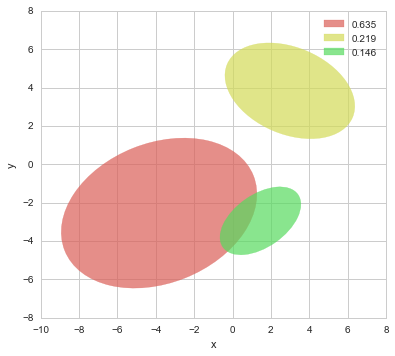

,R_square,K_S,Chi_square,MSE,RMSE / Max,RMSE / Mean
0,0.978,0.027,0.170,6.403154e-08,0.024,0.248


,weight,mean_x,mean_y,sig_x,sig_y,corr
1,0.626,-3.957,-2.625,5.158,3.826,0.258
2,0.222,2.938,3.768,3.462,2.424,-0.319
3,0.152,1.427,-2.900,2.196,1.806,0.497


GMM Plot Result
0.625807453081 [[-3.95740542 -2.62543752]] [ 3.57283473  5.33635838] -69.7911612603
0.222161190989 [[ 2.93763448  3.76811111]] [ 2.20680606  3.60483704] -110.605679458
0.15203135593 [[ 1.42725851 -2.90030929]] [ 1.3866361   2.48190245] -55.8110844256


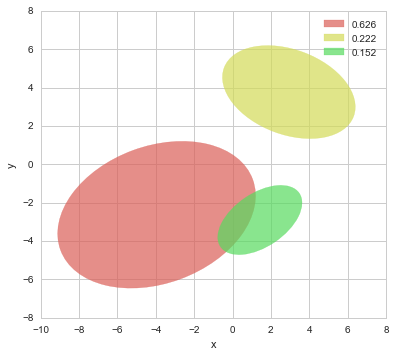

,R_square,K_S,Chi_square,MSE,RMSE / Max,RMSE / Mean
0,0.978,0.026,0.176,6.261407e-08,0.024,0.245


,weight,mean_x,mean_y,sig_x,sig_y,corr
1,0.633,-3.906,-2.666,5.108,3.821,0.258
2,0.227,2.866,3.760,3.426,2.466,-0.317
3,0.140,1.603,-2.856,2.094,1.777,0.494


GMM Plot Result
0.633356352796 [[-3.90607912 -2.66608629]] [ 3.56475394  5.28973249] -69.4010692281
0.226714297949 [[ 2.86563741  3.75998564]] [ 2.23857216  3.57853456] -111.723998646
0.139929349255 [[ 1.60347217 -2.85588072]] [ 1.35460449  2.3889482 ] -54.2185171929


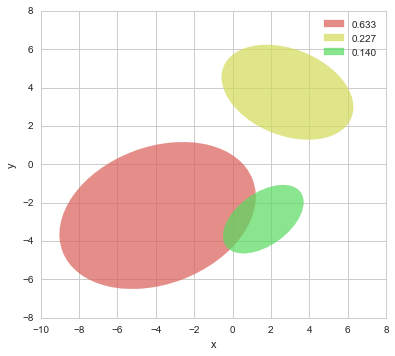

,R_square,K_S,Chi_square,MSE,RMSE / Max,RMSE / Mean
0,0.977,0.029,0.206,6.673607e-08,0.025,0.253


,weight,mean_x,mean_y,sig_x,sig_y,corr
1,0.623,-3.926,-2.611,5.036,3.825,0.244
2,0.234,3.017,3.736,3.438,2.509,-0.317
3,0.143,1.466,-2.906,2.146,1.770,0.464


GMM Plot Result
0.62310117801 [[-3.92620436 -2.61111128]] [ 3.58566837  5.20894168] -69.3647569005
0.233669213229 [[ 3.01748306  3.73577375]] [ 2.27433399  3.59777561] -112.35304392
0.143229608761 [[ 1.46644388 -2.90634196]] [ 1.40002914  2.40376915] -56.3563961011


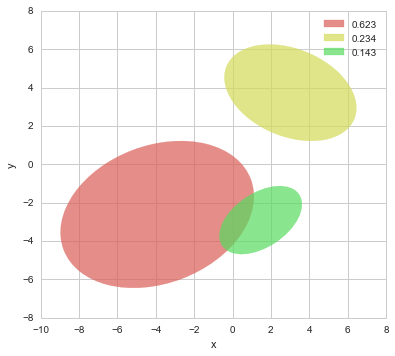

,R_square,K_S,Chi_square,MSE,RMSE / Max,RMSE / Mean
0,0.977,0.028,0.149,6.486929e-08,0.025,0.250


,weight,mean_x,mean_y,sig_x,sig_y,corr
1,0.642,-3.900,-2.438,5.151,4.024,0.283
2,0.206,3.018,3.778,3.255,2.495,-0.341
3,0.152,1.444,-2.956,2.138,1.769,0.459


GMM Plot Result
0.641657267352 [[-3.90037674 -2.43847293]] [ 3.68105499  5.4018084 ] -65.708332662
0.206049513953 [[ 3.01817889  3.77751676]] [ 2.20905069  3.45544273] -115.860044233
0.152293218695 [[ 1.44367053 -2.95624709]] [ 1.40430792  2.39387849] -56.2821061061


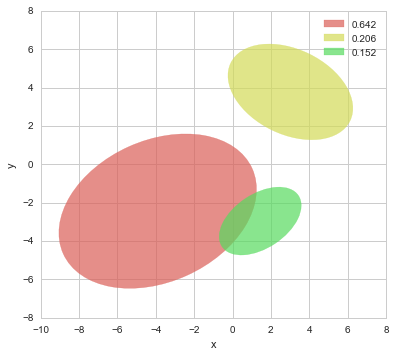

,R_square,K_S,Chi_square,MSE,RMSE / Max,RMSE / Mean
0,0.977,0.028,0.110,6.599416e-08,0.025,0.252


,weight,mean_x,mean_y,sig_x,sig_y,corr
1,0.622,-4.005,-2.630,4.997,3.838,0.228
2,0.229,2.783,3.764,3.472,2.414,-0.327
3,0.149,1.520,-2.900,2.175,1.816,0.483


GMM Plot Result
0.622006259756 [[-4.00542891 -2.62999518]] [ 3.62176131  5.15517762] -69.7686779189
0.228893104528 [[ 2.78341755  3.76411382]] [ 2.18905062  3.6182273 ] -110.678183105
0.149100635717 [[ 1.52010395 -2.90036868]] [ 1.40611091  2.45997356] -55.3139365464


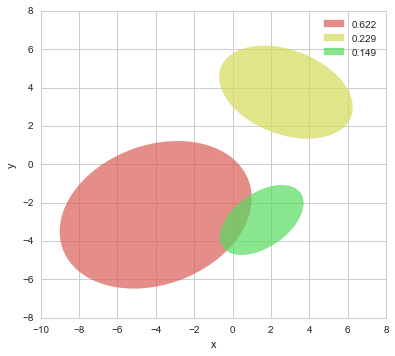

,R_square,K_S,Chi_square,MSE,RMSE / Max,RMSE / Mean
0,0.979,0.027,0.203,6.079727e-08,0.024,0.242


,weight,mean_x,mean_y,sig_x,sig_y,corr
1,0.639,-3.947,-2.422,5.216,4.079,0.320
2,0.202,3.027,3.779,3.191,2.478,-0.348
3,0.159,1.397,-2.923,2.151,1.780,0.465


GMM Plot Result
0.639335050502 [[-3.94686928 -2.42150366]] [ 3.64716573  5.52645091] -63.8968033816
0.201833821774 [[ 3.02731761  3.77918739]] [ 2.17912844  3.4020567 ] -116.856517886
0.158831127724 [[ 1.39745409 -2.92295934]] [ 1.40551888  2.41266467] -56.135678604


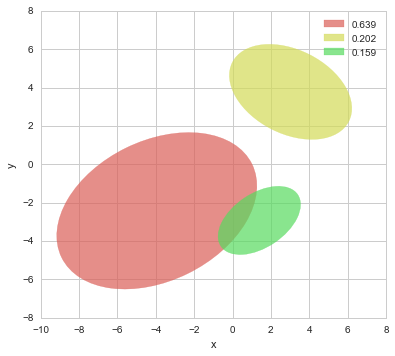

,R_square,K_S,Chi_square,MSE,RMSE / Max,RMSE / Mean
0,0.979,0.028,0.113,6.132543e-08,0.023,0.242


,weight,mean_x,mean_y,sig_x,sig_y,corr
1,0.618,-4.051,-2.670,5.077,3.853,0.273
2,0.228,2.927,3.754,3.430,2.526,-0.326
3,0.154,1.410,-2.938,2.152,1.777,0.475


GMM Plot Result
0.617744068748 [[-4.05112846 -2.6700117 ]] [ 3.55886379  5.28781794] -67.8193173146
0.227919229442 [[ 2.92664773  3.75396247]] [ 2.27365288  3.60168186] -113.182825207
0.15433670181 [[ 1.40968664 -2.93800656]] [ 1.39110442  2.41933576] -56.0239626728


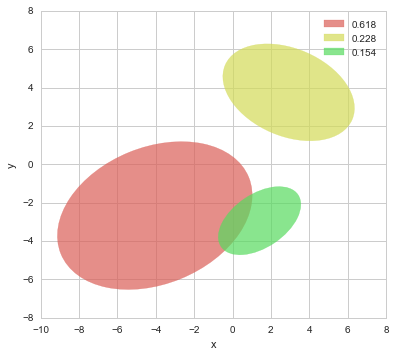

,R_square,K_S,Chi_square,MSE,RMSE / Max,RMSE / Mean
0,0.979,0.027,0.127,6.148370e-08,0.023,0.243


,weight,mean_x,mean_y,sig_x,sig_y,corr
1,0.629,-3.873,-2.580,5.060,3.808,0.254
2,0.223,2.852,3.862,3.487,2.444,-0.284
3,0.148,1.505,-2.864,2.165,1.835,0.501


GMM Plot Result
0.629222066549 [[-3.8726589  -2.57982789]] [ 3.55672844  5.23954457] -69.2840976683
0.222539649892 [[ 2.85235373  3.86168456]] [ 2.26664482  3.60448236] -109.03799855
0.148238283558 [[ 1.50467734 -2.86389783]] [ 1.3887991   2.47538718] -54.1765697756


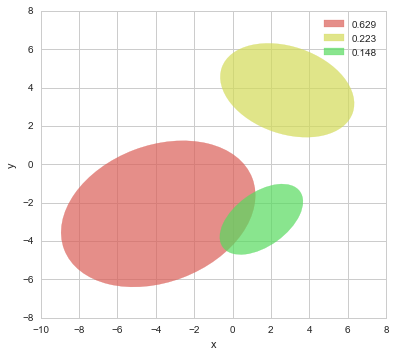

,R_square,K_S,Chi_square,MSE,RMSE / Max,RMSE / Mean
0,0.979,0.026,0.138,6.088728e-08,0.024,0.242


,weight,mean_x,mean_y,sig_x,sig_y,corr
1,0.626,-4.025,-2.448,5.113,4.051,0.303
2,0.209,3.027,3.765,3.346,2.446,-0.339
3,0.165,1.456,-2.883,2.262,1.830,0.470


GMM Plot Result
0.626130164113 [[-4.02481967 -2.44811747]] [ 3.65096165  5.4063303 ] -63.8794351537
0.209162299616 [[ 3.02700643  3.76478544]] [ 2.1871241   3.52084055] -113.375585584
0.164707536271 [[ 1.45643945 -2.88329295]] [ 1.44727414  2.52390406] -57.2153265221


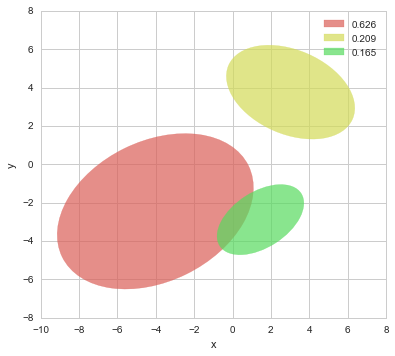

,R_square,K_S,Chi_square,MSE,RMSE / Max,RMSE / Mean
0,0.977,0.027,0.115,6.748540e-08,0.025,0.254


In [68]:
for i in range(10):
    df_resampled = df.sample(frac=1, replace=True)
    result = fit_gmm(df_resampled, number_of_gaussian=NUMBER_OF_GAUSSIAN, fit_method=FIT_METHOD)
    display(pretty_print_gmm(result['gmm']))
    plot_gmm_ellipses(result['gmm'])
    display(gof_df(result['gmm_pdf_result'], result['kde_result']))

## 6.2 Cross-validation, to select the number of Gaussian

In [72]:
## 5-fold cross validation
gaussian_number_range = arange(1,7)
CV_result_train_all,CV_result_test_all =[],[]
number_of_fold = 4
print 'Number of train/test dataset', len(df)*(number_of_fold-1)/number_of_fold, len(df)/number_of_fold

for number_of_gaussian in gaussian_number_range:
    print '  '
    print 'Number of gaussian', number_of_gaussian
    
    kf = KFold(len(df), n_folds=number_of_fold, shuffle=True) 

    CV_result_train, CV_result_test = [],[]
    for train_index, test_index in kf:
        sub_df, sub_df_test = df.iloc[train_index], df.iloc[test_index]

        # 1. Train
        result = fit_gmm(sub_df, fit_method = FIT_METHOD, number_of_gaussian=number_of_gaussian)
        gmm_pdf_result_train = result['gmm_pdf_result']
        kde_result_train = result['kde_result']

        # 2. Validate
        # GMM from Train - KDE from Test
        sample = array(zip(sub_df_test.x, sub_df_test.y))
        kde_test = neighbors.KernelDensity(bandwidth=bandwidth).fit(sample) 
        kde_result_test = exp(kde_test.score_samples(points))

        gof_train = goodness_of_fit_summary(gmm_pdf_result_train, 
                                            kde_result_train,)
        gof_test =  goodness_of_fit_summary(gmm_pdf_result_train, 
                                            kde_result_test,)
                
        CV_result_train.append(gof_train)
        CV_result_test.append(gof_test)
        
    CV_result_train_all.append(CV_result_train)
    CV_result_test_all.append(CV_result_test)
    
    print 'Train'
    pretty_pd_display(CV_result_train)
    print 'Test'
    pretty_pd_display(CV_result_test)

Number of train/test dataset 32519.25 10839.75
  
Number of gaussian 1
Train


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.143884,0.069521,4.527437e-07,0.066085,0.659428,0.842730
1,0.142478,0.071435,4.687004e-07,0.065558,0.670778,0.838762
2,0.146443,0.071255,4.621277e-07,0.065427,0.666214,0.839863
3,0.158244,0.072501,4.660657e-07,0.066487,0.669084,0.839153


Test


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.165831,0.081671,5.072360e-07,0.066328,0.697820,0.827487
1,0.233844,0.070702,4.557052e-07,0.067817,0.661928,0.840222
2,0.155125,0.069098,4.599369e-07,0.067066,0.664526,0.842252
3,0.134022,0.064195,4.511250e-07,0.064096,0.658021,0.843592


  
Number of gaussian 2
Train


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.106950,0.029250,1.432923e-07,0.036193,0.370994,0.950454
1,0.349337,0.041698,2.174748e-07,0.045610,0.456770,0.924835
2,0.284544,0.041759,2.224521e-07,0.045986,0.462464,0.923187
3,0.471134,0.042348,2.199337e-07,0.045341,0.459515,0.923854


Test


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.121603,0.032867,1.840648e-07,0.043309,0.420321,0.936551
1,0.303351,0.038855,2.446396e-07,0.046620,0.485452,0.915504
2,0.839110,0.046627,2.305177e-07,0.045665,0.469716,0.920175
3,0.370379,0.042712,2.463071e-07,0.048403,0.486563,0.915499


  
Number of gaussian 3
Train


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.110606,0.028412,6.372066e-08,0.024526,0.247534,0.977868
1,0.151270,0.026899,6.431914e-08,0.024613,0.248362,0.977856
2,0.106448,0.027447,6.088527e-08,0.023881,0.241833,0.978840
3,0.160509,0.026794,6.239482e-08,0.024125,0.244775,0.978539


Test


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.183923,0.026894,6.516688e-08,0.024532,0.249684,0.977792
1,0.170739,0.031588,6.647624e-08,0.024862,0.253193,0.976764
2,0.133000,0.026655,7.534366e-08,0.026687,0.268911,0.974384
3,0.121886,0.025278,7.097607e-08,0.026066,0.261119,0.975105


  
Number of gaussian 4
Train


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.969749,0.018247,3.350429e-08,0.017716,0.179406,0.988398
1,0.176390,0.008299,3.146628e-08,0.017233,0.173812,0.989079
2,0.079184,0.008916,3.029470e-08,0.016924,0.170526,0.989554
3,0.091222,0.010705,3.290600e-08,0.017488,0.177807,0.988653


Test


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.614953,0.015633,4.772948e-08,0.021238,0.213992,0.983606
1,0.223698,0.014155,3.939988e-08,0.019082,0.194598,0.986561
2,0.787858,0.009530,3.911198e-08,0.018962,0.193952,0.986386
3,0.213240,0.013135,4.467797e-08,0.020796,0.207002,0.984469


  
Number of gaussian 5
Train


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.067093,0.007627,1.892280e-08,0.013302,0.134700,0.993437
1,0.243781,0.009637,1.825427e-08,0.013078,0.132537,0.993708
2,0.329216,0.008011,1.670526e-08,0.012605,0.126643,0.994233
3,0.138744,0.008424,1.990637e-08,0.013623,0.138253,0.993108


Test


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,1.359619,0.015028,2.922177e-08,0.016664,0.167918,0.990016
1,0.079861,0.010810,2.916639e-08,0.016598,0.166857,0.989846
2,0.119795,0.014706,3.409541e-08,0.017549,0.181026,0.988184
3,0.081439,0.013480,2.445117e-08,0.015310,0.153276,0.991602


  
Number of gaussian 6
Train


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.016525,0.013973,1.165014e-08,0.010464,0.105787,0.995967
1,12.083371,0.011764,1.261476e-08,0.010992,0.110063,0.995627
2,0.031701,0.008312,1.454242e-08,0.011576,0.118177,0.994974
3,0.022883,0.013731,1.200778e-08,0.010606,0.107376,0.995864


Test


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.056145,0.015738,2.537599e-08,0.015408,0.156053,0.991282
1,0.078618,0.012725,2.420236e-08,0.014638,0.152472,0.991717
2,0.065777,0.012559,2.824363e-08,0.016756,0.164692,0.990253
3,0.026717,0.013664,2.224903e-08,0.014500,0.146212,0.992235


In [73]:
train_scores_mean, train_scores_std = generate_mean_std_gof(CV_result_train_all)
print 'Train gof mean, std'
display(train_scores_mean)

test_scores_mean, test_scores_std = generate_mean_std_gof(CV_result_test_all)
print 'Test gof mean, std'
display(test_scores_mean)

Train gof mean, std


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.147762,0.071178,4.624094e-07,0.065889,0.666376,0.840127
1,0.302992,0.038764,2.007882e-07,0.043283,0.437436,0.930583
2,0.132208,0.027388,6.282997e-08,0.024286,0.245626,0.978276
3,0.329136,0.011542,3.204282e-08,0.017340,0.175388,0.988921
4,0.194708,0.008425,1.844717e-08,0.013152,0.133033,0.993621
5,3.038620,0.011945,1.270378e-08,0.010909,0.110351,0.995608


Test gof mean, std


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.172206,0.071416,4.685008e-07,0.066327,0.670574,0.838388
1,0.408611,0.040265,2.263823e-07,0.045999,0.465513,0.921933
2,0.152387,0.027604,6.949071e-08,0.025536,0.258227,0.976011
3,0.459937,0.013113,4.272983e-08,0.020019,0.202386,0.985255
4,0.410179,0.013506,2.923369e-08,0.016530,0.167269,0.989912
5,0.056814,0.013672,2.501775e-08,0.015326,0.154857,0.991372


R_square


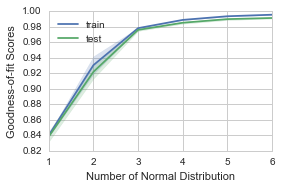

K_S


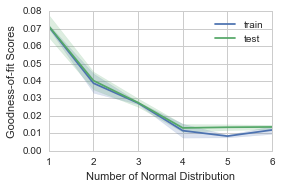

Chi_square


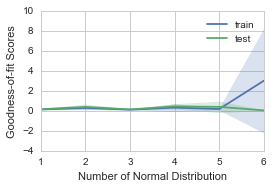

In [74]:
prop_cycle=mpl.rcParams['axes.color_cycle']
for column in ['R_square','K_S','Chi_square', ]:
    plot(gaussian_number_range, train_scores_mean[column],
             '-', label = 'train', color=prop_cycle[0])
    plt.fill_between(gaussian_number_range, 
                     train_scores_mean[column] - train_scores_std[column],
                     train_scores_mean[column] + train_scores_std[column], 
                     alpha=0.2, color=prop_cycle[0])
    
    plot(gaussian_number_range, test_scores_mean[column],
             '-', label = 'test',color=prop_cycle[1])
    plt.fill_between(gaussian_number_range, 
                 test_scores_mean[column] - test_scores_std[column],
                 test_scores_mean[column] + test_scores_std[column], 
                 alpha=0.2,color=prop_cycle[1])
    plt.xticks(gaussian_number_range)
    print column
    plt_configure(xlabel='Number of Normal Distribution', ylabel='Goodness-of-fit Scores', 
                  figsize=(4,2.5), legend={'loc':'best'})
    plt.show()

In [75]:
import time
save_notebook()
time.sleep(3)
location_name = get_location_name(ipath)
current_file = 'GMM.ipynb'
output_file = './output_HTML/'+location_name+'.html' 
output_HTML(current_file, output_file)

## 6.3 Variability of KDE

In [76]:
sss

NameError: name 'sss' is not defined

In [ ]:
gaussian_number

In [ ]:
gmm1 = [0.552104,-0.055681,2.256591,2.757752,2.731348,0.034628,
        0.372591,2.376362,-2.098443,1.621717,2.213625,-0.01429,
        0.055879,1.009152,-1.430799,2.10049,0.808011,0.08083,
        0.019425,-0.432981,2.574572,0.784784,0.796954,-0.020531]

gmm2 = [0.552104,-0.055681,2.256591,2.757752,2.731348,0.034628,
        0.372591,2.376362,-2.098443,1.621717,2.213625,-0.01429,]

gmm3 = [0.552104,-0.055681,2.256591,2.757752,2.731348,0.034628,]

gmms = [gmm1,gmm2,gmm3]
pdfs =[]

for gmm in gmms:
    plot_gmm_ellipses(gmm)
    gmm = group_gmm_param_from_gmm_param_array(gmm) 
    mixed_model_pdf = generate_gmm_pdf_from_grouped_gmm_param(gmm)
    X = Y = PLOT_AXIS_RANGE
    pdf_Z = generate_Z_from_X_Y(X,Y, mixed_model_pdf)# passing a function as an argument
    pdfs.append(pdf_Z)
    plot_2d_prob_density(X,Y,pdf_Z)

In [ ]:
plot_2d_prob_density(X,Y,pdfs[0]-pdfs[1])

In [ ]:
for start_time in xrange(20000000, 20150000, 50000):
    end_time = start_time + 50000 
    sub_df = df_all_years.query('(date >= @start_time) & (date < @end_time)')
    sample = sub_speed_set = array(zip(sub_df.x, sub_df.y))
    points = FITTING_RANGE
    
    # 2. KDE + EM fitting
    kde = neighbors.KernelDensity(bandwidth=bandwidth).fit(sample) 
    
    X = Y = PLOT_AXIS_RANGE
    kde_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(kde.score_samples(coords)))
    fig, ax = plt.subplots()
    fig.set_size_inches(14, 4)
    plot_2d_prob_density(X,Y,kde_Z,ax)
    plt.show()
#     plot_speed_and_angle_distribution(sub_df.speed, sub_df.dir)

In [ ]:
# 5-fold cross validation
gaussian_number_range = arange(3,5)
CV_result_train_all,CV_result_test_all =[],[]
number_of_fold = 4
print 'Number of train/test dataset', len(df)*(number_of_fold-1)/number_of_fold, len(df)/number_of_fold

for number_of_gaussian in gaussian_number_range:
    print '  '
    print 'Number of gaussian', number_of_gaussian
    
    kf = KFold(len(df), n_folds=number_of_fold, shuffle=True) 

    CV_result_train, CV_result_test = [],[]
    for train_index, test_index in kf:
        sub_df, sub_df_test = df.iloc[train_index], df.iloc[test_index]

        # 1. Train
        result = fit_gmm(sub_df, number_of_gaussian, fit_method = FIT_METHOD)
        gmm_pdf_result_train = result['gmm_pdf_result']
        kde_train = result['kde_clf']
        kde_result_train = result['kde_result']

        # 2. Validate
        # GMM from Train - KDE from Test
        sample = array(zip(sub_df_test.x, sub_df_test.y))
        kde_test = neighbors.KernelDensity(bandwidth=bandwidth).fit(sample) 
        kde_result_test = exp(kde_test.score_samples(points))

        gof_train = goodness_of_fit_summary(gmm_pdf_result_train, 
                                            kde_result_train,)
        gof_test =  goodness_of_fit_summary(gmm_pdf_result_train, 
                                            kde_result_test,)
                
        # Plot jPDF
        X = Y = PLOT_AXIS_RANGE
        kde_train_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(kde_train.score_samples(coords)))
        fig = plt.figure(figsize=(22,6))
        ax1 = fig.add_subplot(1,3,1)
        plot_2d_prob_density(X,Y,kde_train_Z, ax1)
        
        ax2 = fig.add_subplot(1,3,2)
        kde_test_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(kde_test.score_samples(coords)))
        plot_2d_prob_density(X,Y,kde_test_Z, ax2)
            
        ax3 = fig.add_subplot(1,3,3)
        plot_2d_prob_density(X,Y,kde_train_Z-kde_test_Z,ax3)
        
        pretty_pd_display([gof_train, gof_test], index=["gof_train", "gof_test"]))
        